# Master

## 0. PREPARING NOTEBOOK

    0.1 Import Libraries

    0.2 Defining important functions

## 1. DATA PREPARATION

    1.1	Check for missing value count

        1.1.1	Visualizing missing data using sns.heatmap
        1.1.2	Visualizing missing data using msno.matrix
        1.1.3	Checking missing values in each feature and inspecting the questions of the respective features
        1.1.4	Inspecting all the questions
    
    1.2	Considering all features as performing imputation and one-hot encoding

        1.2.1	Now checking for the remaining features with missing values
        1.2.2	Checking which data to impute: mean, median or mode
        1.2.3	Checking Categorical Data
        1.2.4	Final inspection of missing data using a SNS and msno heatmaps



## 2. DATA EXPLORATION

    2.1	Exploring - the profession of the responders and their cumulative frequency
    
    2.2	Exploring the age group and sex ratio of the responders with thier response frequency
    
    2.3	Exploring the Gender and Salary distribution of the responders with their response frequency
    
    2.4	Box Plots for salary distribution

        2.4.1	Exploring Distribution of salary with age
        2.4.2	Exploring Distribution of salary with work experience
        2.4.3	Exploring Distribution of salary with Profession
        2.4.4	Exploring Distribution of salary with Country
        2.4.5	Exploring Distribution of salary with Amount spend on machine learning tools


## 3. FEATURE SELECTION

    3.1	Converting categorical data into numbers

        3.1.1	Label Encoding Ordinal Data
        3.1.2	Encoding for Nominal Data
                    - Correlation Matrix
                    - Feature Selection by random forest (accepted)
                    - Feature Selection by Lasso Regression (accepted)
        3.1.3	Performing Standard Scaling and PCA

## 4. MODEL IMPLIMENTATION

    4.1	Finding the salary class probabilities on test data by implimenting ordinal logistic regression
    
    4.2	Exploring the dataframe of salary class probabilities
    
    4.3	Model Accuracy and Confusion Matrix
    
    4.4	Cross validation for training and testing accuracy of the model over 10 folds of training data
    
    4.5	Model Evaluation with Learning Curve (Bias Variance Tradeoff)

## 5. MODEL TUNING

    
    5.1	Lasso-Feature-Selection Tuning
    
    5.2	Multi-Class-Ordinal-Logistic-Regression Tuning

## 6. TESTING & DISCUSSION

    6.1	Using the optimal model to make predictions on test set
    
    6.2	Comparing the dataframe of salary class probabilities Tuned and Untuned
    
    6.3	Comparing Model Accuracy and Confusion Matrix Tuned and Untuned
    
    6.4	Cross validation for training and testing accuracy of the TUNED model over 10 folds
    
    6.5	TUNED Model Evaluation with Learning Curve (Bias Variance Tradeoff)
    
## 7. CONCLUSION


# --------------------------------------------------------------------------------------------------------------


# 0. PREPARING NOTEBOOK ---------------------------------------------------------------------

## 0.1. Import Libraries

In [ ]:
import numpy as np
import sklearn
import csv
import pandas as pd

from numpy import random, array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, label_binarize, MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

!pip install plotly==4.5.1
import plotly.express as px
import plotly.graph_objects as go
import math

import seaborn as sns

from IPython.display import Image

from sklearn.linear_model import Lasso, LogisticRegression

from sklearn.feature_selection import SelectFromModel

!pip install missingno
import missingno as msno 

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

## 0.2. Defining important functions

### Preview of defined functions and their application

    1 missing_data_perc(df) = Check null values in all the cells of the dataframe
    
    2 ordinal_salary_logistic_regression(X_train, X_test, y_train, solver='saga',
                                       C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
                                       penalty='l2', max_iter=5000) = Predict probabilites of each class and return a data
                                                                       frame of the same
                                                                       
    3 predict_proba_ordinal_salary_logistic_regression(output_of_ordinal_salary_logistic_regression) = Predict the class of 
                        each row of the testing data set taking the maximum probability from each row and imputing the class
                        
    4 cross_validation(X_train, y_train, n_splits=10, solver='saga', C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
                         penalty='l2', max_iter=5000) = return all the accuracies, f1 scores, precision and recall of the 
                                                         training feature and target data across n folds
                                                         
    5 learning_curve(X, y, test_sizes = [0.75, 0.60, 0.45, 0.30, 0.15], n_splits=5, 
                   solver ='saga', C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], penalty='l2', max_iter=5000) = can give the training and
                                                                           testing accuracies based on varying training size
                                                                           
    6 plot_learning_curve(train_acc_mean_df, train_acc_meanstd_df, testing_acc_mean_df, testing_acc_meanstd_df) = to plot 
                the learning curve of the model based on varying train samples - used for bias variance trade off assessment
                
    7 negative_count_df(df) = search for negative values in a data frame
    
    8 gridsearch_ordinal_salary_logistic_regression(X_train, X_test, y_train, solver='saga', cv = 10,
                                                  param = {'C':[0.01,0.05,0.1,0.5,1,1.5,2,3,4,5]}, 
                                                  penalty = 'l2', max_iter=1000) = Apply grid search to oridinal salary 
                                                                   Logistic regression and find the C value for each model.
                                                                   It also predicts the output on the testing data (X_test)
                                                                   to give an output salary probabiliteis
                        

In [ ]:
def missing_data_perc(df):
    
    """
    APPLICATION OF THE FUNCTION:
        Check null values in all the cells of the dataframe
    
    PARAMETERS:
        - df = data frame you want to check
    
    RETURN:
        - percentage of total missing values over total cells
    """    
    
    missing_value_count = df.isna().sum().sort_values(ascending=False)
    totalcells = np.product(df.shape)
    totalmissing = missing_value_count.sum()
    
    return (totalmissing/totalcells)*100

In [ ]:
def ordinal_salary_logistic_regression(X_train, X_test, y_train, solver='saga',
                                       C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], penalty='l2', max_iter=5000):
    
    """
    APPLICATION OF THE FUNCTION:
        Predict probabilites of each class and return a dataframe of the same
    
    PARAMETERS:
        - X_train = the training features you want to fit the logistic_regression model with
        - X_test = the testing features with which you want to predict the probabilities from the trained model
        - y_train = the training targets you want to fit the logistic_regression model with
        - solver = the solver to impliment on logistic regression model
        - C = the list of 14 penalties to be used on Logistic Regression model, for now all are '1' by default
        - max_iter = the maximum number of iterations you want the solver to work for
        - penalty = regularization penalty for logistic regression, defualt = 'l2'
    
    RETURN:
        - dataframe of probabilities of all the salary classes from 0 to 14 sorted column wise
    """        
    
    
    """
    # combining all the different y train for 0 to 13 models, keeping 0 as 0 and all other classes as 1, then keeping
    0,1 as 0 and all other as 1 and.... so on for 14 models (0 to 13)
    """  
    consideration = np.arange(1,15,1)
    total_y_train = {}
    modelnum = 0

    for i in consideration:
        list_y_train = []
        for j in range (len(y_train)):
            if np.array(y_train)[j] < i:
                list_y_train.append(0)
            else:
                list_y_train.append(1)
        total_y_train[modelnum]=list_y_train
        modelnum += 1

    y_train_all_model = pd.DataFrame.from_dict(total_y_train, orient = 'index').T
    
    # calling logistic regression model for each of the 14 models using respective C value (defualt = 1)
    
    prob_all_model = []
    prob_salary_class = []
    
    for i in range(0,14):
        LR_model = LogisticRegression(solver=solver,C=C[i],max_iter=max_iter, penalty = penalty)
        LR_model.fit(X_train, y_train_all_model.iloc[:,i])
        prob_model = LR_model.predict_proba(X_test)
        prob_all_model.append(prob_model)
        
    prob_all_model = np.array(prob_all_model)
    
    # implimenting the subtraction of probababilites from previous model to the current model to get the individual class prob.
    
    prev_prob = [0]*X_test.shape[0]
    for j in range (0,14):
        prob_class = prob_all_model[j][:,0]
        final_prob = DataFrame(prob_class)-DataFrame(prev_prob)
        prob_salary_class.append(final_prob)
        prev_prob = prob_class
    
    prob_salary_class.append(prob_all_model[-1][:,1])
    prob_salary_class = np.array(prob_salary_class) #so that the shape of the list can be extracted easily
    
    # converting the output to dataframe with columns sorted from 0 to 14 with respective probabilities
    
    df_prob_salary_class = DataFrame(prob_salary_class[0])
    
    for k in range(1,prob_salary_class.shape[0]): # appending new columns with final probability of the respective classes
        temp = DataFrame(prob_salary_class[k])
        df_prob_salary_class[k] = temp
    
    return df_prob_salary_class

In [ ]:
def predict_proba_ordinal_salary_logistic_regression(output_of_ordinal_salary_logistic_regression):
    
    """
    APPLICATION OF THE FUNCTION:
        Predict the class of each row of the testing data set taking the maximum probability from each row and imputing the 
        class
    
    PARAMETERS:
        - output_of_ordinal_salary_logistic_regression = the dataframe with the probabilities of the individual classes on the 
                                                        testing data set as obtained from the FUNCTION of -
                                                        ordinal_salary_logistic_regression()
    
    RETURN:
        - dataframe of predicted salary classes the salary classes from 0 to 14 sorted column wise
    """  
    y_pred = []
    
    for i in range (0, output_of_ordinal_salary_logistic_regression.shape[0]):
        y_pred.append(output_of_ordinal_salary_logistic_regression.iloc[i].index[output_of_ordinal_salary_logistic_regression.iloc[i] == max(output_of_ordinal_salary_logistic_regression.iloc[i])])
    
    y_pred = pd.DataFrame(y_pred)
    
    return y_pred
    
    

In [ ]:
def cross_validation(X_train, y_train, n_splits=10, solver='saga', C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], 
                     penalty='l2', max_iter=5000):

    """
    APPLICATION OF THE FUNCTION:
        return all the accuracies, f1 scores, precision and recall of the training feature and target data across n folds
    
    PARAMETERS:
        - X_train = feature data we want to perform cross validation upon. Usually this would be the training feature data we 
                    want to perform cross validation upon
        - y_train = target data we want to perform cross validation upon. Usually this would be the training target data we 
                    want to perform cross validation upon
        - n_splits = number of folds of cross validation to be performed
        - solver = the solver for the logistic regression model
        - C = the list of 14 penalties to be used on Logistic Regression model, for now all are '1' by default
        - max_iter = the maximum number of iterations you want the solver for Logistic Regression to work
        - penalty = regularization penalty for logistic regression, defualt = 'l2'

    RETURN:
        - numpy array of accuracy_testing, accuracy_training, recall, precision, f1_score
    """  
    
    kfold = StratifiedKFold(n_splits=n_splits)
    """
    This cross-validation object is a variation of KFold that returns stratified folds.
    The folds are made by preserving the percentage of samples for each class.
    """      
    accuracy_test = np.zeros(n_splits)
    accuracy_train = np.zeros(n_splits)
    recall=np.zeros(n_splits)
    precision=np.zeros(n_splits)
    f1_score=np.zeros(n_splits)
    
    np_idx = 0
    
    #y_train=np.array(y_train)
    
    for train_idx, test_idx in kfold.split(X_train, y_train): #y_train given for stratified splitting
        
        # Dividing X_train into further training and testing for each validation
        X_traincv, X_testcv = X_train.values[train_idx], X_train.values[test_idx]
        
        # Dividing y_train into further training and testing for each validation
        y_traincv, y_testcv = y_train.values[train_idx], y_train.values[test_idx]
    
        y_traincv = pd.Series(y_traincv)
        
        # for predicting testing error
        fitting_test = ordinal_salary_logistic_regression(X_traincv, X_testcv, y_traincv, solver=solver,
                                       C=C, penalty=penalty, max_iter=max_iter)
        predictions_test = predict_proba_ordinal_salary_logistic_regression(fitting_test)
        
        # for predicting training error
        fitting_train = ordinal_salary_logistic_regression(X_traincv, X_traincv, y_traincv, solver=solver,
                                       C=C, penalty=penalty, max_iter=max_iter)
        predictions_train = predict_proba_ordinal_salary_logistic_regression(fitting_train)
        
        acc_test=accuracy_score(y_testcv,predictions_test)  # Computing accuracy of testing dataset
        acc_train=accuracy_score(y_traincv,predictions_train)   # Computing accuracy of training dataset

        accuracy_test[np_idx] = acc_test               # Storing testing accuracy in the array
        accuracy_train[np_idx] = acc_train           # Storing training accuracy in the array
    
        recall[np_idx] = recall_score(y_testcv, predictions_test, average='weighted')  # Computing recall value
        precision[np_idx] = precision_score(y_testcv, predictions_test, average='weighted')   # Computing precision value
        f1_score[np_idx]=2*precision[np_idx]*recall[np_idx]/(precision[np_idx]+recall[np_idx])   # Computing f1-score
            
        np_idx += 1
    
    return accuracy_test, accuracy_train, recall, precision, f1_score

In [ ]:
def learning_curve(X, y, test_sizes = [0.75, 0.60, 0.45, 0.30, 0.15], n_splits=5, 
                   solver ='saga', C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], penalty='l2', max_iter=5000):
    
    """
    APPLICATION OF THE FUNCTION:
        can give the training and testing accuracies based on varying training sizes
    
    PARAMETERS:
        - X = feature data
        - y = target data
        - test_sizes = number of different train and testing splits we want our model to learn from
        - n_splits = number of folds of cross validation to be performed
        - solver = the solver for the logistic regression model
        - C = the list of 14 penalties to be used on Logistic Regression model, for now all are '1' by default
        - max_iter = the maximum number of iterations you want the solver for Logistic Regression to work
        - penalty = regularization penalty for logistic regression, defualt = 'l2'

    RETURN:
        - dataframe of training and testing accuracy mean and standard deviation
    """  
    
    all_training_acc_dict = {}
    all_training_acc_dict_std = {}
    
    all_testing_acc_dict = {}
    all_testing_acc_dict_std = {}
    
    ####################################### 
    # mimicing the functionality of the scikit learn's learning_curve() function and implementing on our model
    ######################################
    
    for i in range (np.array(test_sizes).shape[0]):
        
        ## Splitting the data into train and testing data
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_sizes[i], random_state=101, stratify=y)
        
        ## training the model with the training data obtained after the splitting -
        accuracy_test, accuracy_train, recall, precision, f1_score = cross_validation(X_train, y_train, n_splits=n_splits, 
                                                                                      solver =solver, C=C, penalty=penalty, 
                                                                                      max_iter=max_iter)
        train_scores_mean = np.mean(accuracy_train)
        train_scores_std = np.std(accuracy_train)
        test_scores_mean = np.mean(accuracy_test)
        test_scores_std = np.std(accuracy_test)
        
        all_training_acc_dict[y_train.shape[0]] = train_scores_mean
        all_training_acc_dict_std[y_train.shape[0]] = train_scores_std
        
        all_testing_acc_dict[y_train.shape[0]] = test_scores_mean
        all_testing_acc_dict_std[y_train.shape[0]] = test_scores_std
        
    train_acc_mean_df = pd.DataFrame.from_dict(all_training_acc_dict, orient = 'index')
    train_acc_meanstd_df = pd.DataFrame.from_dict(all_training_acc_dict_std, orient = 'index')
    testing_acc_mean_df = pd.DataFrame.from_dict(all_testing_acc_dict, orient = 'index')
    testing_acc_meanstd_df = pd.DataFrame.from_dict(all_testing_acc_dict_std, orient = 'index')
        
    return train_acc_mean_df, train_acc_meanstd_df, testing_acc_mean_df, testing_acc_meanstd_df

In [ ]:
def plot_learning_curve(train_acc_mean_df, train_acc_meanstd_df, testing_acc_mean_df, 
                        testing_acc_meanstd_df, title = 'Logistic Regression'):

    """
    APPLICATION OF THE FUNCTION:
        to plot the learning curve of the model based on varying train samples - used for bias variance trade off assessment
    
    PARAMETERS:
        - train_acc_mean_df = dataframe of mean of training accuracy
        - train_acc_meanstd_df = dataframe of standard deviation of training accuracy
        - testing_acc_mean_df = dataframe of mean of testing accuracy
        - testing_acc_meanstd_df = dataframe of standard deviation of testing accuracy
        - title = the title of the chart, default is 'Logistic Regression'
        
    RETURN:
        - plot of learning curve
    """  
    
    plt.figure(figsize=(10,6))
    plt.title(title)
 
    plt.xlabel("Training examples")
    plt.ylabel('Accuracy')
    
    train_sizes = train_acc_mean_df.index.values
    train_scores_mean = train_acc_mean_df[0].values
    train_scores_std = train_acc_meanstd_df[0].values
    test_scores_mean = testing_acc_mean_df[0].values
    test_scores_std = testing_acc_meanstd_df[0].values
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="y", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

In [ ]:
def negative_count_df(df):

    """
    APPLICATION OF THE FUNCTION:
        search for negative values in a data frame
    
    PARAMETERS:
        - df = dataframe
        
    RETURN:
        - list of negative values, min and max of negative values
    """
    neg_values = []
    for i in df.columns:
        for j in df.index.values:
            if df[i][j] < 0:
                neg_values.append(df[i][j])
                
    return neg_values, min(neg_values), max(neg_values)

In [ ]:
def gridsearch_ordinal_salary_logistic_regression(X_train, X_test, y_train, solver='saga', cv = 10,
                                                  param = {'C':[0.01,0.05,0.1,0.5,1,1.5,2,3,4,5]}, 
                                                  penalty = 'l2', max_iter=1000):
    
    """
    APPLICATION OF THE FUNCTION:
        Apply grid search to oridinal salary logistic regression and find the C value for each model.
        It also predicts the output on the testing data (X_test) to give an output salary probabiliteis
    
    PARAMETERS:
        - X_train = dataframe for feature data for model training
        - y_train = dataframe for target data for model training
        - X_test = dataframe for testing the trained model
        - solver = the solver for the logistic regression model
        - param = the list of 14 different penalties to be used on grid search for Logistic Regression model
        - max_iter = the maximum number of iterations you want the solver for Logistic Regression to work
        - penalty = regularization penalty for logistic regression, defualt = 'l2' 
        
    RETURN:
        - list of negative values, min and max of negative values
    """
    
    consideration = np.arange(1,15,1)
    total_y_train = {}
    modelnum = 0

    for i in consideration:
        list_y_train = []
        for j in range (len(y_train)):
            if np.array(y_train)[j] < i:
                list_y_train.append(0)
            else:
                list_y_train.append(1)
        total_y_train[modelnum]=list_y_train
        modelnum += 1

    y_train_all_model = pd.DataFrame.from_dict(total_y_train, orient = 'index').T
    
    ### GRID SEARCH function #####################################
    
    lr_tuned = LogisticRegression(solver = solver, penalty = penalty, max_iter = max_iter)
    lr_grid = GridSearchCV(lr_tuned, param, cv = cv,verbose=True)
    
    ############################################################
    
    prob_all_model = []
    prob_salary_class = []
    grid_best_score = []
    grid_best_param = []
    
    for i in range(0,14):
        lr_grid.fit(X_train, y_train_all_model.iloc[:,i])
        prob_model = lr_grid.predict_proba(X_test)
        prob_all_model.append(prob_model)
        grid_best_score.append(lr_grid.best_score_)
        grid_best_param.append(lr_grid.best_params_['C'])
    
    prob_all_model = np.array(prob_all_model)
    
    prev_prob = [0]*X_test.shape[0]
    for j in range (0,14):
        prob_class = prob_all_model[j][:,0]
        final_prob = DataFrame(prob_class)-DataFrame(prev_prob)
        prob_salary_class.append(final_prob)
        prev_prob = prob_class
    
    prob_salary_class.append(prob_all_model[-1][:,1])
    prob_salary_class = np.array(prob_salary_class)
    
    # has the 1st column of class '0' predictions and 2nd column of class 1 prediction prob.
    # converting to dataframe
    df_prob_salary_class = DataFrame(prob_salary_class[0])
    for k in range(1,prob_salary_class.shape[0]):
        temp = DataFrame(prob_salary_class[k])
        df_prob_salary_class[k] = temp
    
    return df_prob_salary_class, grid_best_score, grid_best_param

# 1. DATA PREPARATION --------------------------------------------------------------------------

In [ ]:
## reading relevant files and making a relevant

df_org = pd.read_csv('Kaggle_Salary.csv', low_memory=False) # original data frame
df = df_org.copy()
df_ques = pd.read_csv('questions_only.csv')


## A dictionary which will act as a reference key to check which label belongs to salary bracket

salary_encode = {   '$0-9,999': 0,
    '10,000-19,999': 1,
    '20,000-29,999': 2,
    '30,000-39,999': 3, 
    '40,000-49,999': 4, 
    '50,000-59,999': 5,
    '60,000-69,999': 6,
    '70,000-79,999': 7, 
    '80,000-89,999': 8, 
    '90,000-99,999': 9,
    '100,000-124,999':10,
    '125,000-149,999':11,
    '150,000-199,999':12,
    '200,000-249,999':13,
    '250,000-> $500,000':14}

In [ ]:
## Initial exploration of raw data in pandas

df_count=df.shape[0]
print("Number of responses =",df_count)
df.head()

Number of responses = 12497


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"


In [ ]:
## exploring the question types

from pandas import DataFrame
from IPython.display import HTML
HTML(DataFrame(df_ques).to_html())

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice,How long have you been writing code to analyze data (at work or at school)?,Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which types of specialized hardware do you use on a regular basis? (Select all that apply) - Selected Choice,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice,Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice,Which categories of computer vision methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice,Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice,Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply) - Selected Choice,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice


## 1.1. Check for missing value count

### 1.1.1 Visualizing missing data using sns.heatmap

Text(0.5, 1, 'Missing data visualization across the dataframe')

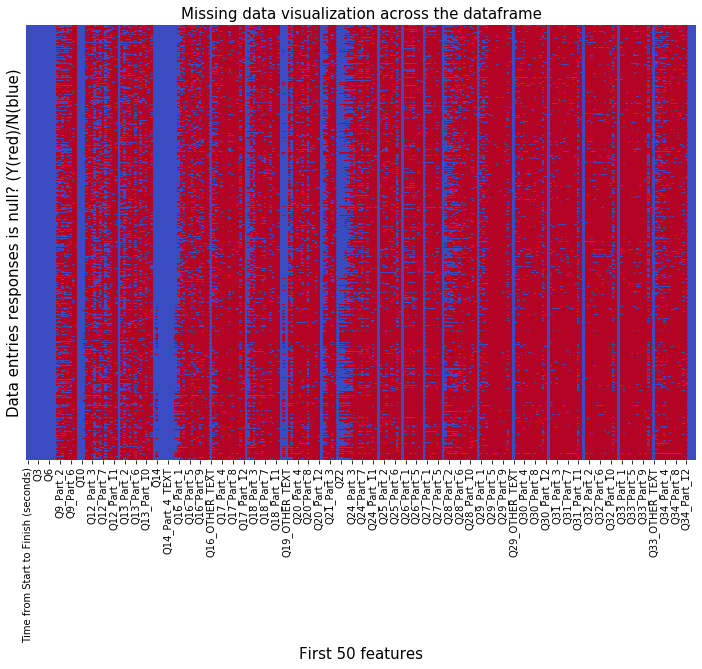

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
ax.set_xlabel('First 50 features', Fontsize = 15)
ax.set_ylabel('Data entries responses is null? (Y(red)/N(blue)', Fontsize = 15)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 15)

### Observation:
Many of the features have missing data which is evident from the sns heatmap of null values

### 1.1.2 Visualizing missing data using msno.matrix

Text(0.5, 1.0, 'Missing data visualization across the dataframe')

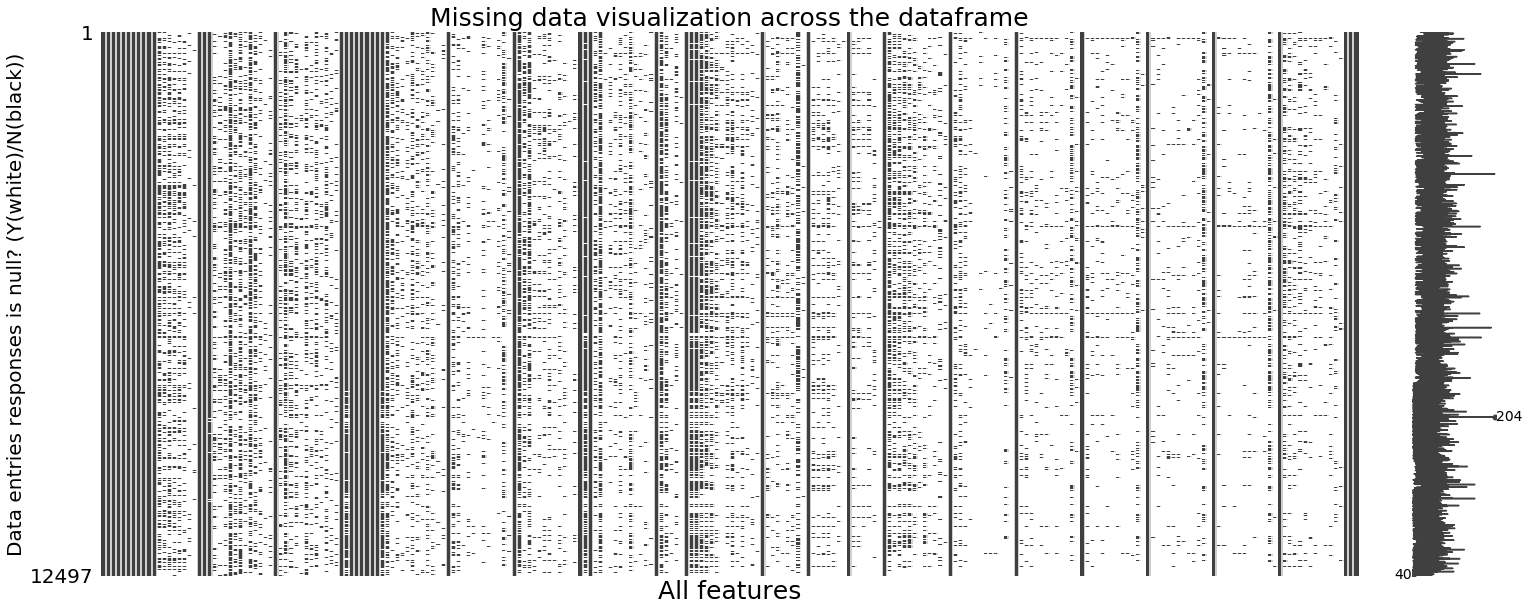

In [ ]:
ax = msno.matrix(df)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

### Observation:
The **msno.matrix** nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion., the x axis is are features and y axis are the 12497 entries, and the broken lines if each feature represents the missing values. The wavy verticle line on the right display the row wise count of the missing values.

Also, the data towards the end of the dataframe (features on the right) is mostly missing and needs to be inspected on

### 1.1.3 Checking missing values in each feature and inspecting the questions of the respective features

In [ ]:
## checking missing values in each features
missing_value_count = df.isna().sum().sort_values(ascending=False)
missing_value_count #type = pandas series

Q33_Part_9                             12469
Q26_Part_7                             12456
Q27_Part_6                             12451
Q17_Part_9                             12437
Q18_Part_11                            12428
                                       ...  
Q14_Part_4_TEXT                            0
Q14_Part_3_TEXT                            0
Q14_Part_2_TEXT                            0
Q14_Part_1_TEXT                            0
Time from Start to Finish (seconds)        0
Length: 248, dtype: int64

In [ ]:
print('shape of data = ', df.shape)
print ('missing cells percentage is =', missing_data_perc(df))

shape of data =  (12497, 248)
missing cells percentage is = 70.23640512432662


### Observation:
We cannot drop the features with such a high count of missing values as most of them are multiple choice questions. Hence they need to be analysed individually so that we may impute/label/one hot encode or drop these features after proper analysis

### 1.1.4 Inspecting all the questions

Checking the relevance of each question with respect to subjectivity and applicability to predict salary -

#### Irrelevant Questions -
   - **Time from Start to Finish (seconds)** = This is irrelevant and does not give any insight into the person's salary
   - **Q10** = This salary feature is also irrelevant as there already exists an encoded and bucketed version of this feature

#### Subjective Questions (which are opinion based and are not hard quantifiable answers) - 
   - **Q12** - Who/what are your favorite media sources that report on data science topics? = This question is subjective and cannot be used to predict the salary of the respondant.
   - **Q19** - What programming language would you recommend an aspiring data scientist to learn first? = There is already question 18 which asks the user about the programming language they use, and asking their recommendation on Q19 becomes redundant and highly subjective which should not be used to predict the salary of the respondant.
    
#### 'OTHER_TEXT' columns -

   - It is observed that other text columns have free flow text which donot have any keys to connect them. These values might disturb our machine learning algorith. Hence **deleting** such columns.

### Observation:

The discussed features can be removed based on the justification discussed above

In [ ]:
## dropping the questions discussed above -

q12_list = [col for col in df.columns if 'Q12' in col]
q19_list = [col for col in df.columns if 'Q19' in col]
other_text_list = [col for col in df.columns if 'OTHER_TEXT' in col]
total_ques_to_drop = q12_list + q19_list + other_text_list
total_ques_to_drop.append('Time from Start to Finish (seconds)')
total_ques_to_drop.append('Q10')

In [ ]:
df = df.drop(total_ques_to_drop, axis = 1)

In [ ]:
print('shape of data = ', df.shape)
print ('missing cells percentage is =', missing_data_perc(df))

shape of data =  (12497, 210)
missing cells percentage is = 78.60446507161718


## NOTE:

It was observed that many multiple choice questions had the name 'PART' in them to denote the responses by each person. Hence analysing them first and implimenting one hot encoding for them so that each choice is accounted for in the data frame and no weight is assigned.

In [ ]:
## Parsing data frame for features with 'part'

ques_with_part = [col for col in df.columns if 'Part' in col]
ques_with_part

['Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_5',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q14_Part_1_TEXT',
 'Q14_Part_2_TEXT',
 'Q14_Part_3_TEXT',
 'Q14_Part_4_TEXT',
 'Q14_Part_5_TEXT',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',
 'Q17_Part_1',
 'Q17_Part_2',
 'Q17_Part_3',
 'Q17_Part_4',
 'Q17_Part_5',
 'Q17_Part_6',
 'Q17_Part_7',
 'Q17_Part_8',
 'Q17_Part_9',
 'Q17_Part_10',
 'Q17_Part_11',
 'Q17_Part_12',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_Part_7',
 'Q18_Part_8',
 'Q18_Part_9',
 'Q18_Part_10',
 'Q18_Part_11',
 'Q18_Part_12',
 'Q20_Part_1',
 'Q20_Part_2',
 'Q20_Part_3',
 'Q20_Part_

Removing q14 from the list part since q14 has multiple categorical data in a single feature and hence would be treated differently - also get_dummies function gives an error while running on q14 for the same reason

In [ ]:
ques_with_part.remove('Q14_Part_1_TEXT'), ques_with_part.remove('Q14_Part_2_TEXT'),ques_with_part.remove('Q14_Part_3_TEXT'),
ques_with_part.remove('Q14_Part_4_TEXT'), ques_with_part.remove('Q14_Part_5_TEXT')

(None, None)

## 1.2. Considering all features as performing imputation and one-hot encoding

In [ ]:
## performing one hot encoding for the multiple choice questions:

df_encoded = pd.get_dummies(df, columns = ques_with_part)

In [ ]:
print('shape of data = ', df_encoded.shape)
print ('missing cells percentage is =', missing_data_perc(df_encoded))

shape of data =  (12497, 210)
missing cells percentage is = 0.23891448233290274


#### Now handling q14 and performing one hot encoding

In [ ]:
## now tackling q14 and performing one hot encoding on that

df_encoded['Q14'] = df_encoded['Q14'].astype(str)
df_encoded['Q14'].unique()

array(['Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Local development environments (RStudio, JupyterLab, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)', 'Other',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'nan'], dtype=object)

In [ ]:
dummies_q14 = pd.get_dummies(df_encoded.Q14)
dummies_q14

,"Advanced statistical software (SPSS, SAS, etc.)","Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Local development environments (RStudio, JupyterLab, etc.)",Other,nan
0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
12492,0,0,0,0,0,0,1
12493,0,0,0,0,0,0,1
12494,0,0,0,0,1,0,0
12495,0,0,0,0,0,0,1


In [ ]:
## renaming the columns of encoded dummies_q14 dataframe

dummies_q14.columns = ['Q14_Part_1_Advanced statistical software (SPSS, SAS, etc.)',
                       'Q14_Part_2_Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
                       'Q14_Part_3_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
                       'Q14_Part_4_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
                       'Q14_Part_5_Local development environments (RStudio, JupyterLab, etc.)',
                       'Q14_Part_6_Other',
                       'Q14_Part_7_nan']

In [ ]:
## dropping nan column from dummies_q14

dummies_q14 = dummies_q14.drop('Q14_Part_7_nan', axis = 1)

In [ ]:
## dropping the existing q14 columns (qty = 6)

q14_to_drop = [col3 for col3 in df_encoded.columns if 'Q14' in col3]
df_encoded = df_encoded.drop(q14_to_drop, axis=1)

In [ ]:
## adding new q14 columns to df_encoded (qty = 6)

df_encoded = pd.concat([df_encoded, dummies_q14], axis = 1)

In [ ]:
## checking data frame parameters
## its is 247 columns and not 248 as we dropped 8 features while deleting the q14 and replaced it with 6 features

print('shape of data = ', df_encoded.shape)
print ('missing cells percentage is =', missing_data_perc(df_encoded))

shape of data =  (12497, 210)
missing cells percentage is = 0.19909540194408562


### 1.2.1 Checking for the remaining features with missing values

In [ ]:
## checking for features with missing data and their count and storing those feature names in 'final_misssing'

final_missing = []
value_missing = []

for col4 in df_encoded:
    i = df_encoded[col4].isna().sum()
    if i!=0:
        print(col4,"has ---",i,"missing values\n")
        final_missing.append(col4)
        value_missing.append(i)

Q11 has --- 247 missing values

Q15 has --- 1075 missing values

Q22 has --- 1947 missing values

Q23 has --- 1956 missing values



In [ ]:
## evaluating the percentage of nan values with respect to the total data entries

max_perc = (max(value_missing)/df_count)*100
print("max % of nan values per feature is = ", max_perc)

max % of nan values per feature is =  15.651756421541169


### Observation:
Since **only a maximum of 15% of values are missing**, hence **it makes sense to impute** values

In [ ]:
## exploring the data with missing values -

df_encoded[final_missing].head()

,Q11,Q15,Q22,Q23
0,$0 (USD),1-2 years,Never,1-2 years
1,"> $100,000 ($USD)",I have never written code,NaN,NaN
2,"$10,000-$99,999",1-2 years,Once,2-3 years
3,$0 (USD),< 1 years,Never,< 1 years
4,"$10,000-$99,999",20+ years,Never,10-15 years


### 1.2.2 Checking which data to impute: mean, median or mode

In [ ]:
## tackling q11 and plotting ordered bar chart and reordering the data in ascending order for plotting

q11 = df_encoded['Q11'].value_counts()
q11 = q11.reindex(index = ['$0 (USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999', '> $100,000 ($USD)'])

q15 = df_encoded['Q15'].value_counts()
q15 = q15.reindex(index = ['I have never written code',
                           '< 1 years',
                           '1-2 years',
                           '3-5 years',
                           '5-10 years',
                           '10-20 years',
                           '20+ years'])

q22 = df_encoded['Q22'].value_counts()

q23 = df_encoded['Q23'].value_counts()

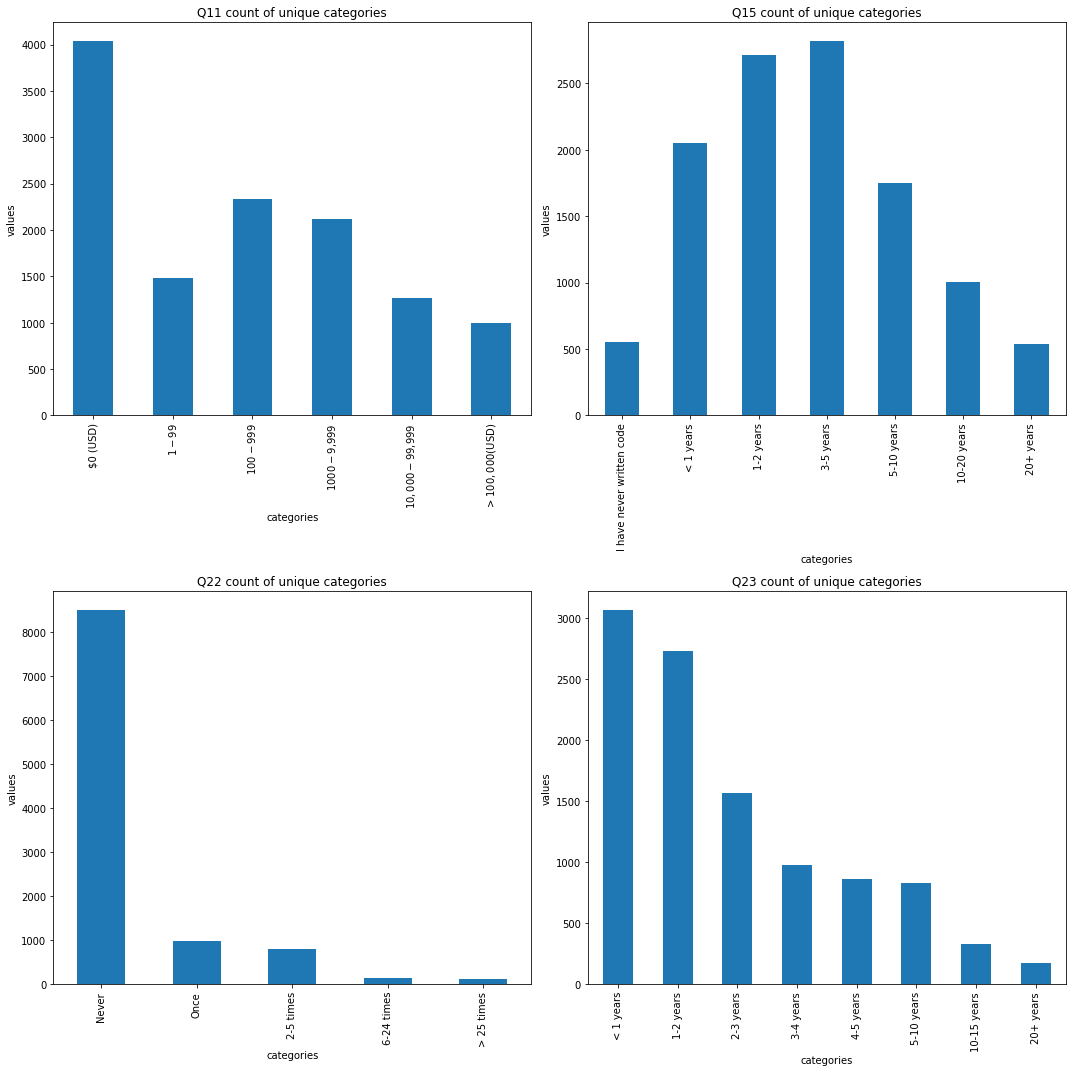

In [ ]:
plt.figure(figsize=(15,15))
    
plt.subplot(2,2,1)
q11.plot.bar()
plt.title('Q11 count of unique categories')
plt.xlabel('categories')
plt.ylabel('values')

plt.subplot(2,2,2)
q15.plot.bar()
plt.title('Q15 count of unique categories')
plt.xlabel('categories')
plt.ylabel('values')

plt.subplot(2,2,3)
q22.plot.bar()
plt.title('Q22 count of unique categories')
plt.xlabel('categories')
plt.ylabel('values')

plt.subplot(2,2,4)
q23.plot.bar()
plt.title('Q23 count of unique categories')
plt.xlabel('categories')
plt.ylabel('values')

plt.tight_layout()

### Observation:

#### For imputing values in place of missing values

- The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value
- Since q11 is not normally dist., hence selecting mode to replace null values

#### Considering the above graphs for q11,15,19,22 and 23 - 

- q11 = randomly distributed, hence mode will be imputed
- q15 = normally distributed, hence mean will be imputed
- q22 = skewed distribution, hence mode will be imputed
- q23 = skewed distribution, hence mode will be imputed
#### in q15, the mean category is also the most frequent category, hence all the questions will be imputed with most frequent entry


In [ ]:
#imputing values

for i in final_missing:
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent',verbose=1)
    imp.fit(df_encoded[i].values.reshape((-1,1)))
    df_encoded[i]=imp.transform(df_encoded[i].values.reshape((-1,1)))

In [ ]:
## checking data frame parameters

print('shape of data = ', df_encoded.shape)
print ('missing cells percentage is =', missing_data_perc(df_encoded))

shape of data =  (12497, 210)
missing cells percentage is = 0.0


### 1.2.3 Checking Categorical Data

Now selecting all the remaining columns which have categorical data types and performing appropritate label/one hot encoding 

In [ ]:
## selecting columns with object as their data type
object_columns = df_encoded.select_dtypes(include=['object']).columns
object_columns = set(object_columns) - {'Q10_buckets'}

## displaying columns with object data type
df_encoded.select_dtypes(include=['object']).head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q15,Q22,Q23,Q10_buckets
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,$0 (USD),1-2 years,Never,1-2 years,"30,000-39,999"
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","> $100,000 ($USD)",I have never written code,Never,< 1 years,"0-9,999"
2,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"$10,000-$99,999",1-2 years,Once,2-3 years,">250,000"


#### Handling Q2

In [ ]:
## Exploring Q2

df_encoded['Q2'].unique()

array(['Male', 'Female', 'Prefer to self-describe', 'Prefer not to say'],
      dtype=object)

'Prefer to self-describe' and 'Prefer not to say' in context of use essentially mean the same thing and hence can be merged in one

In [ ]:
df_encoded['Q2'] = df_encoded['Q2'].replace('Prefer to self-describe', 'Prefer not to say')
df_encoded['Q2'].unique()

array(['Male', 'Female', 'Prefer not to say'], dtype=object)

#### Handling Q15

In [ ]:
## Exploring Q15

df_encoded['Q15'].unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years'], dtype=object)

Having years written after the experience makes the data insconsistent with the feature age which does not have age but a numeric value. Also Sorting the range becomes difficult. Hence removing age from the Q15

In [ ]:
df_encoded['Q15'] = df_encoded['Q15'].replace({'1-2 years': '1-2', 'I have never written code': '0', '< 1 years':'0-1',
                                               '20+ years':'20+', '3-5 years':'3-5', '5-10 years':'5-10', 
                                               '10-20 years':'10-20'})
df_encoded['Q15'].unique()

array(['1-2', '0', '0-1', '20+', '3-5', '5-10', '10-20'], dtype=object)

### 1.2.4 Final inspection of missing data using a SNS and msno heatmaps

In [ ]:
## checking data frame parameters

print('shape of data = ', df_encoded.shape)
print ('missing cells percentage is =', missing_data_perc(df_encoded))

shape of data =  (12497, 210)
missing cells percentage is = 0.0


Text(0.5, 1, 'Missing data visualization across the dataframe')

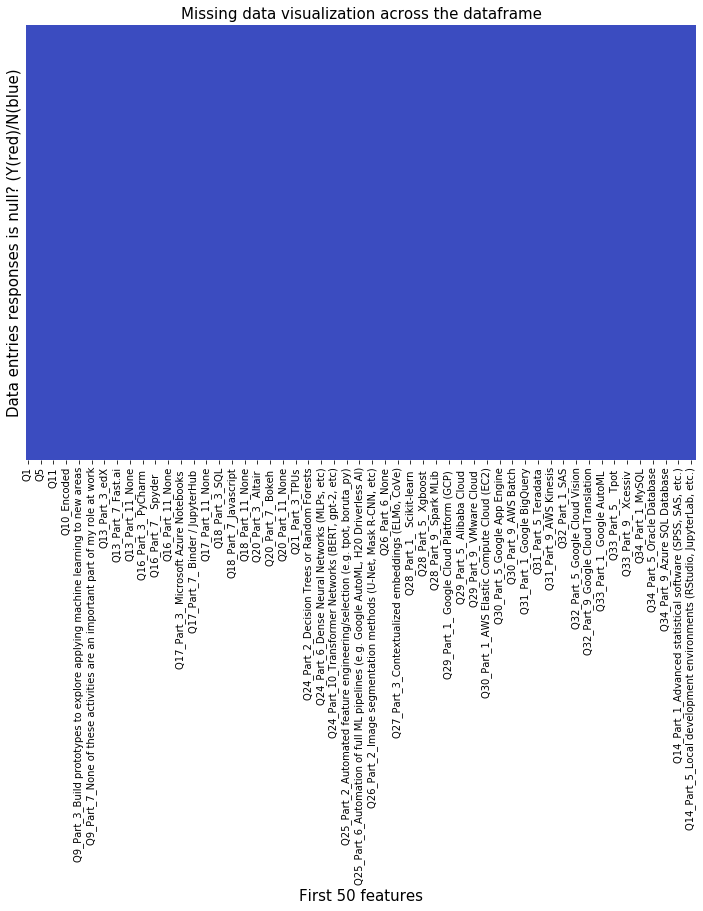

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(df_encoded.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
ax.set_xlabel('First 50 features', Fontsize = 15)
ax.set_ylabel('Data entries responses is null? (Y(red)/N(blue)', Fontsize = 15)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 15)

### Observation:

Since the heatmap is monocoloured in blue, it appears that there is no missing data left in our data frame

In **msno.matrix**, the straight verticle line on the righ represents that thier are no missing values (null) in our data frame


In **msno.matrix**, the straight verticle line on the righ represents that thier are no missing values(null) in our data frame


Text(0.5, 1.0, 'Missing data visualization across the dataframe')

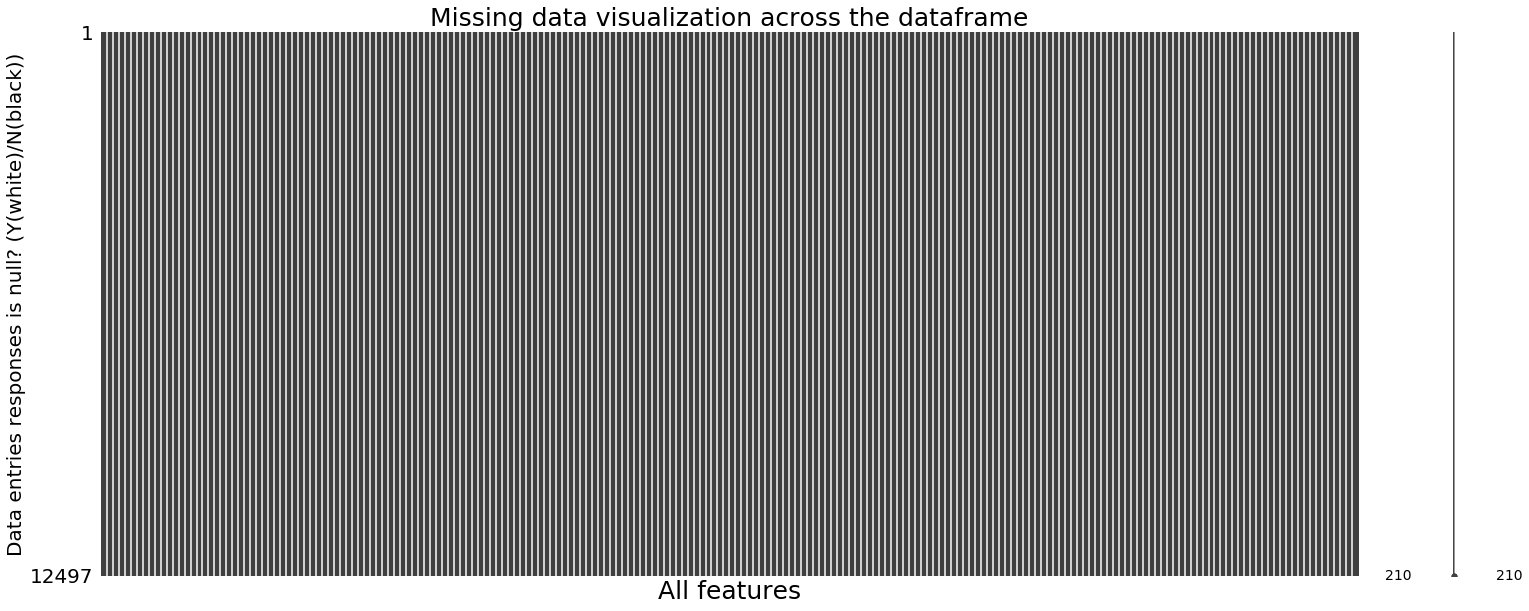

In [ ]:
print('\nIn **msno.matrix**, the straight verticle line on the righ represents that thier are no missing values' 
      '(null) in our data frame')
ax = msno.matrix(df_encoded)
ax.set_xlabel('All features', Fontsize = 25)
ax.set_ylabel('Data entries responses is null? (Y(white)/N(black))', Fontsize = 20)
ax.set_title('Missing data visualization across the dataframe', Fontsize = 25)

### Observation:

Since the heatmap is monocoloured in black and the row wise null frequency verticle line on the right is perfectly straight, it appears that there is no missing data left in our data frame

# 2. Data Exploration ----------------------------------------------------------------------------------

In [ ]:
sns.set_style('whitegrid')

## 2.1 Exploring - the profession of the responders and thier cumulative frequency

Text(0, 0.5, 'Count of Response')

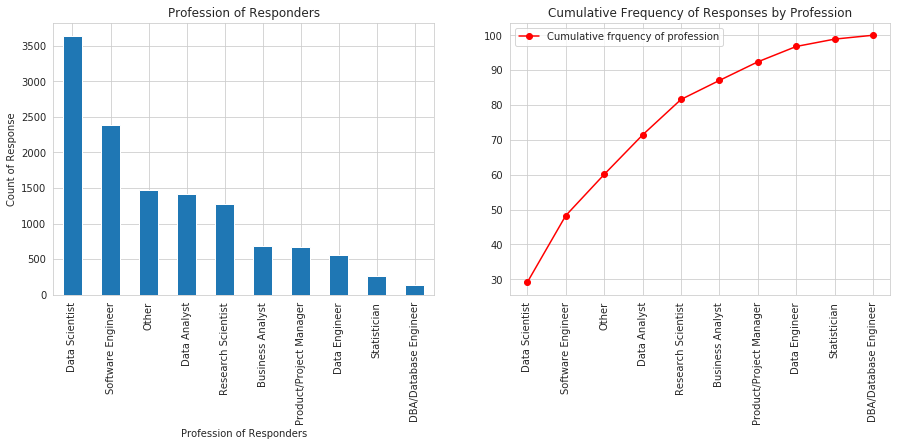

In [ ]:
## Calculating the cumulative count frequency of the responders by profession

total_entries = df_encoded.shape[0]
frequency_percent = [i/total_entries*100 for i in df_encoded['Q5'].value_counts()]
cum_frequency_percent = np.cumsum(frequency_percent) #calculation of cumulative value

plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
plt.xticks(rotation='vertical')
plt.plot(df_encoded['Q5'].value_counts().index.tolist(), cum_frequency_percent, 'r-o', 
         label='Cumulative frquency of profession')
plt.title("Cumulative Frequency of Responses by Profession")
plt.legend()

## exploring the profession of responders:

plt.subplot(1,2,1)
ax = df_encoded['Q5'].value_counts().plot(kind='bar',title="Profession of Responders")
ax.set_xlabel("Profession of Responders")
ax.set_ylabel("Count of Response")

### Observation:
Hence it is observed that **Data Scientists** and **Software Engineers** are the **top most responders** of the survey which when observed via "Cumulative Frequency of Responses by Profession" show that they make up for almost **50% of responses**

## 2.2 Exploring the age group and sex ratio of the responders with thier response frequency

In [ ]:
## exploring the age group of responders  with genders: using pivot tables

df_encoded_plot1 = df_encoded[['Q1', 'Q2']]
df_encoded_plot1['count'] = 1

In [ ]:
## using pivot table to filter out desired columns

df_encoded_plot2 = pd.pivot_table(df_encoded_plot1, values = 'count', index = 'Q1',
                                  columns = 'Q2', aggfunc=np.sum, fill_value=0)

Text(0, 0.5, 'Count of Response')

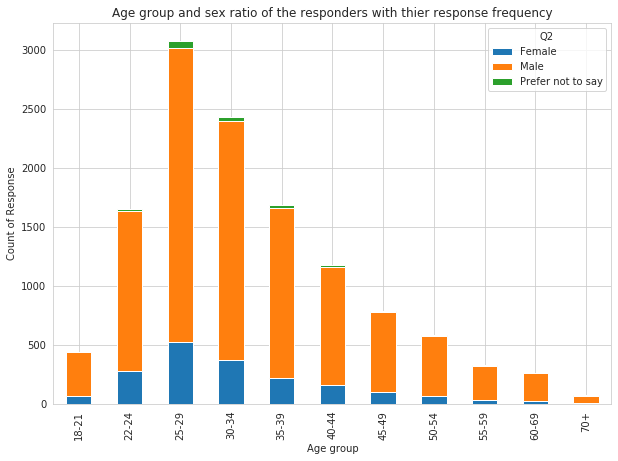

In [ ]:
ax2 = df_encoded_plot2.plot.bar(stacked=True, figsize=(10,7))
ax2.set_title("Age group and sex ratio of the responders with thier response frequency")
ax2.set_xlabel("Age group")
ax2.set_ylabel("Count of Response")

### Observation:
25-29 and 30-34 age groups gave the most responses in the survey and most of them were males

## 2.3 Exploring the Gender and Salary distribution of the responders with their response frequency



([<matplotlib.axis.XTick at 0x7ff222d64ef0>,
 <a list of 15 Text xticklabel objects>)

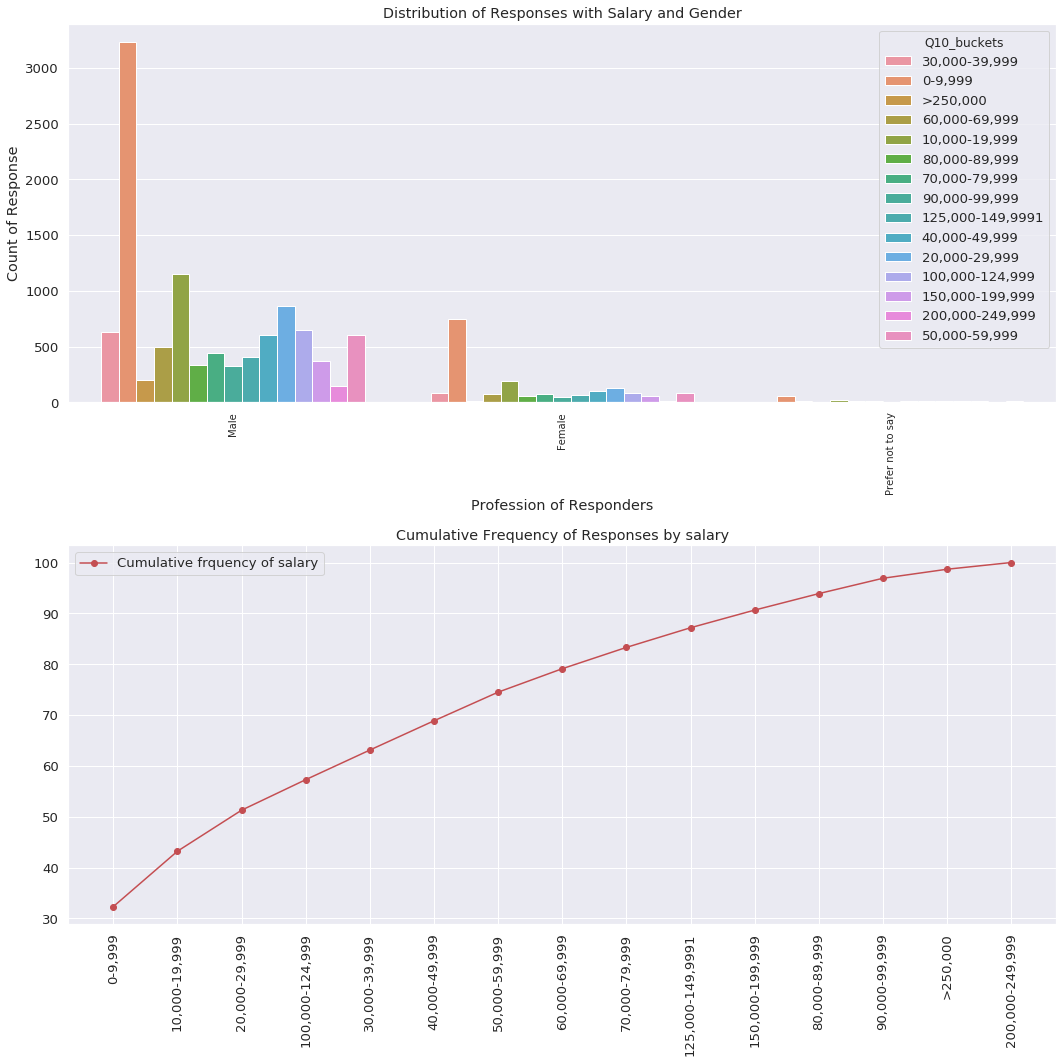

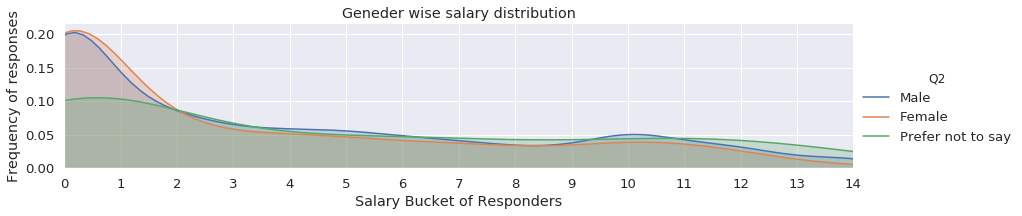

In [ ]:
plt.figure(figsize=(15,15))

sns.set(font_scale=1.2)
plt.subplot(2,1,1)
ax = sns.countplot(x=df_encoded['Q2'], hue=df_encoded['Q10_buckets'], data=df_encoded)

plt.xticks(rotation='vertical', fontsize="10")
ax.set_title("Distribution of Responses with Salary and Gender")
ax.set_xlabel("Profession of Responders")
ax.set_ylabel("Count of Response")

plt.subplot(2,1,2)
total_entries3 = df_encoded.shape[0]
frequency_percent3 = [i/total_entries3*100 for i in df_encoded['Q10_buckets'].value_counts()]
cum_frequency_percent3 = np.cumsum(frequency_percent3) #calculation of cumulative value
plt.xticks(rotation='vertical')
plt.plot(df_encoded['Q10_buckets'].value_counts().index.tolist(), cum_frequency_percent3, 'r-o', 
         label='Cumulative frquency of salary')
plt.title("Cumulative Frequency of Responses by salary")
plt.legend()

plt.tight_layout()

facet = sns.FacetGrid(df_encoded, hue='Q2', aspect=4)
facet.map(sns.kdeplot, 'Q10_Encoded', shade=True)
facet.set(xlim=(0, df_encoded['Q10_Encoded'].max()))
facet.add_legend()
plt.xlabel("Salary Bucket of Responders")
plt.ylabel("Frequency of responses")
plt.title("Geneder wise salary distribution")
plt.xticks(np.arange(0,15,1))

### Observation
- From the cumulative frequency plot it is evident that **more than 50% of the responses lie in the salary range of 0 to 30,000 Dollars.**
- From the Distribution of Responses with Salary and Gender plot, it is evident that **most of the female and male responders lie in the salary bracket of 0 to 9,999 Dollars**
- From the Gender wise salary distribution chart, Male, Female and Prefer Not to say Category have almost the **same salary distribution with a concentration around bucket 0 to 2 i.e 0 to $30,000**

## 2.4 Box Plots for salary distribution

 A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
 
<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/box-and-whisker-plot.jpg" width="600"/>

Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### 2.4.1 Exploring Distribution of salary with age

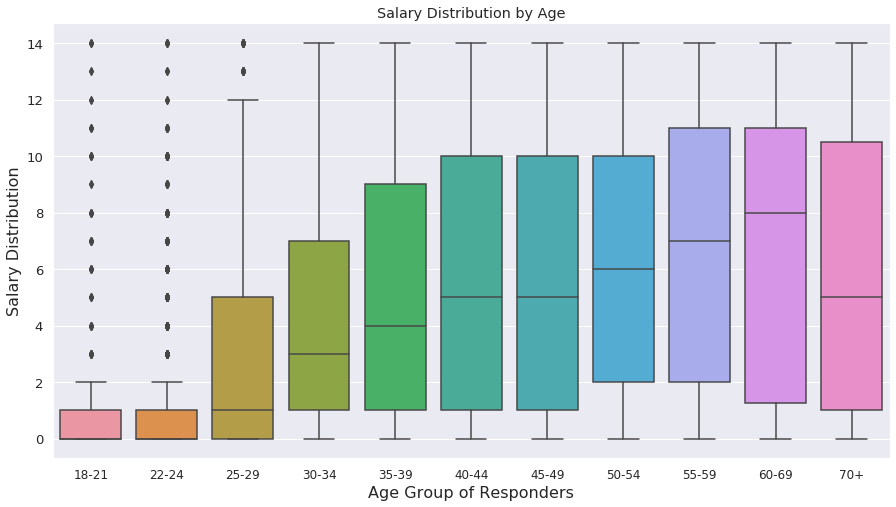

Y label Key =  {'$0-9,999': 0, '10,000-19,999': 1, '20,000-29,999': 2, '30,000-39,999': 3, '40,000-49,999': 4, '50,000-59,999': 5, '60,000-69,999': 6, '70,000-79,999': 7, '80,000-89,999': 8, '90,000-99,999': 9, '100,000-124,999': 10, '125,000-149,999': 11, '150,000-199,999': 12, '200,000-249,999': 13, '250,000-> $500,000': 14}


In [ ]:
## for age group salary distribution

plt.figure(figsize=(15,8))

ax = sns.boxplot(y='Q10_Encoded', x='Q1', data=df_encoded.sort_values(by=['Q1']))

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
ax.set_title("Salary Distribution by Age")
ax.set_xlabel("Age Group of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.xticks(rotation = 'horizontal')
plt.show()

print("Y label Key = ", salary_encode)

### Observation - 
It is evident from the plot that **as age increases, the  salary variation and the median salary also increases**. However, the data spread is overlapping in most of the age groups. Hence, the feature - age **may contribute well** for modelling ML algorith for salary prediction . Also, the variation increases with age with highest variation in salary being at 70+ age 

### 2.4.2 Exploring Distribution of salary with work experience

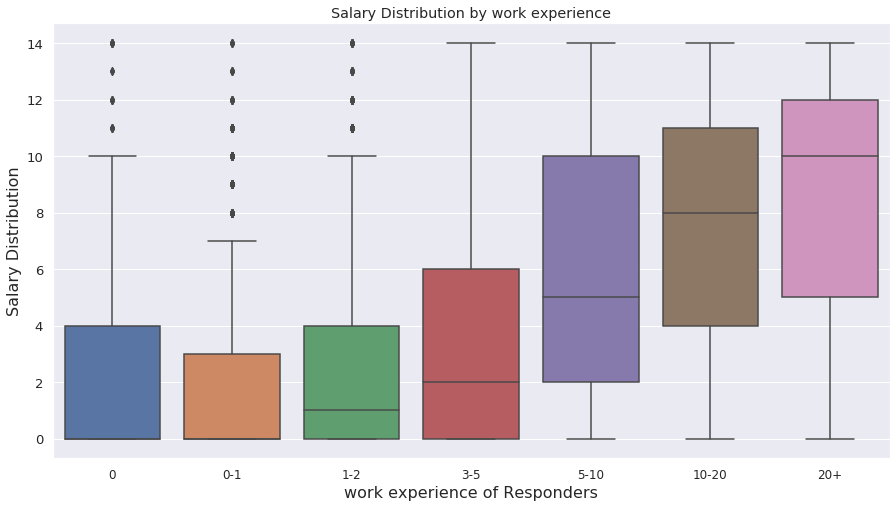

Y label Key =  {'$0-9,999': 0, '10,000-19,999': 1, '20,000-29,999': 2, '30,000-39,999': 3, '40,000-49,999': 4, '50,000-59,999': 5, '60,000-69,999': 6, '70,000-79,999': 7, '80,000-89,999': 8, '90,000-99,999': 9, '100,000-124,999': 10, '125,000-149,999': 11, '150,000-199,999': 12, '200,000-249,999': 13, '250,000-> $500,000': 14}


In [ ]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(y='Q10_Encoded', x='Q15', data=df_encoded, order = ['0','0-1','1-2','3-5','5-10','10-20','20+'])

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
ax.set_title("Salary Distribution by work experience")
ax.set_xlabel("work experience of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.xticks(rotation = 'horizontal')
plt.show()

print("Y label Key = ", salary_encode)

### Observation -
It is evident from the plot that the spread (position of each quartile) of each group varies slightly than the other, and **as work experience increases, the median salary also increases**. thus this feature **can contribute well** in modeling.

### 2.4.3 Exploring Distribution of salary with Profession

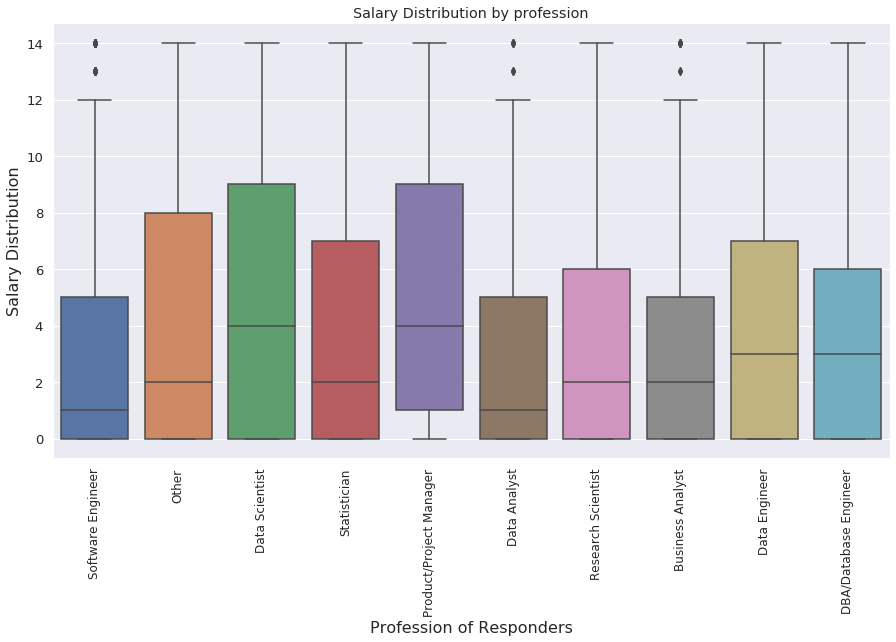

Y label Key =  {'$0-9,999': 0, '10,000-19,999': 1, '20,000-29,999': 2, '30,000-39,999': 3, '40,000-49,999': 4, '50,000-59,999': 5, '60,000-69,999': 6, '70,000-79,999': 7, '80,000-89,999': 8, '90,000-99,999': 9, '100,000-124,999': 10, '125,000-149,999': 11, '150,000-199,999': 12, '200,000-249,999': 13, '250,000-> $500,000': 14}


In [ ]:
plt.figure(figsize=(15,8))

ax = sns.boxplot(y='Q10_Encoded', x='Q5', data=df_encoded)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
ax.set_title("Salary Distribution by profession")
ax.set_xlabel("Profession of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.show()

print("Y label Key = ", salary_encode)

### Observation -
The median lies around the range of 2 to 4 or between $20,000  to  $60,000, hence there is not much variation seen in the plot above. So, this feature **may not contribute much** for the salary prediction model.

### 2.4.4 Exploring Distribution of salary with Country

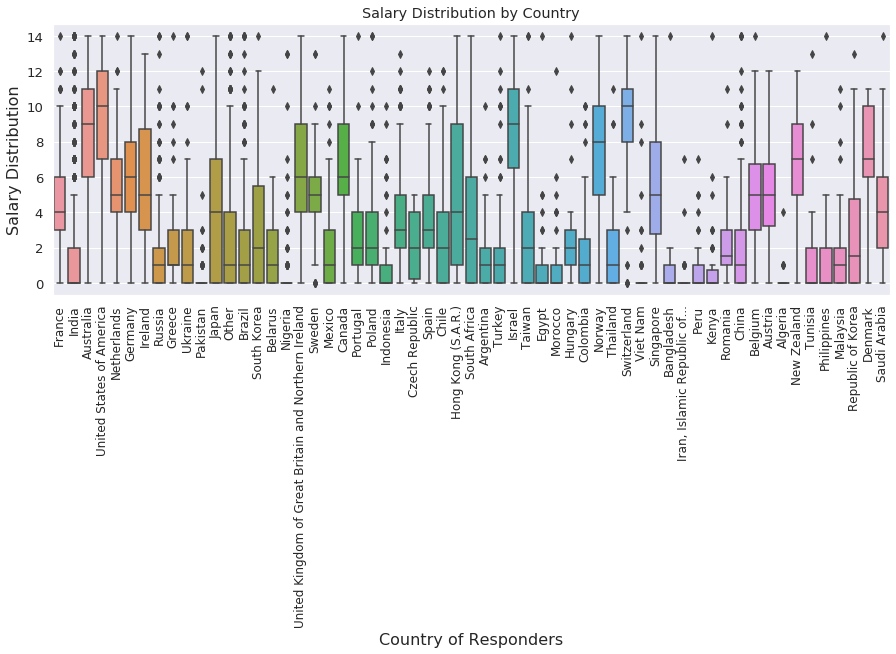

Y label Key =  {'$0-9,999': 0, '10,000-19,999': 1, '20,000-29,999': 2, '30,000-39,999': 3, '40,000-49,999': 4, '50,000-59,999': 5, '60,000-69,999': 6, '70,000-79,999': 7, '80,000-89,999': 8, '90,000-99,999': 9, '100,000-124,999': 10, '125,000-149,999': 11, '150,000-199,999': 12, '200,000-249,999': 13, '250,000-> $500,000': 14}


In [ ]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(y='Q10_Encoded', x='Q3', data=df_encoded)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
ax.set_title("Salary Distribution by Country")
ax.set_xlabel("Country of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.show()

print("Y label Key = ", salary_encode)

### Observation -
Here we observe much variation in the plot above. So, this feature **may contribute well** for the salary prediction model. **Australia, USA, Israel and Switzerland** being the countries whose 3rd quartile lies above salary class 10 or $125,000

### 2.4.5 Exploring Distribution of salary with Amount spend on machine learning tools

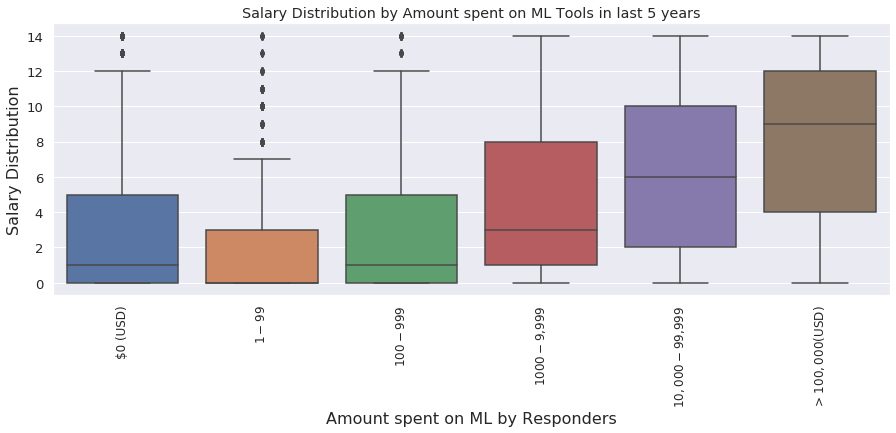

Y label Key =  {'$0-9,999': 0, '10,000-19,999': 1, '20,000-29,999': 2, '30,000-39,999': 3, '40,000-49,999': 4, '50,000-59,999': 5, '60,000-69,999': 6, '70,000-79,999': 7, '80,000-89,999': 8, '90,000-99,999': 9, '100,000-124,999': 10, '125,000-149,999': 11, '150,000-199,999': 12, '200,000-249,999': 13, '250,000-> $500,000': 14}


In [ ]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(y='Q10_Encoded', x='Q11', data=df_encoded, order = ['$0 (USD)', '$1-$99', '$100-$999', 
                                                                     '$1000-$9,999', '$10,000-$99,999',
                                                                     '> $100,000 ($USD)'])

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
ax.set_title("Salary Distribution by Amount spent on ML Tools in last 5 years")
ax.set_xlabel("Amount spent on ML by Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.show()

print("Y label Key = ", salary_encode)

### Observation -
here we observe as **one spends more money on ML, the person has a better salary.** The reason might be that the person having the capacity to spend more money on ML tools would either be working in a very large company with great remuneration or would be earning surplus to spend on ML. In any case, this distribution **may contribute** to the salary prediction model. 

# 3. Feature Selection ---------------------------------------------------------------------------------

In [ ]:
## creating in a copy of the data frame so that the original one can be used for data exploration

df_encoded_final = df_encoded.copy()

## 3.1 Converting categorical data into numbers

we need to convert the categorical data into number because our ML model Logistic Regression cannot take strings or objects as input. Only numbers are accepted as input

In [ ]:
print('List of columns with categorical data', object_columns)

List of columns with categorical data {'Q4', 'Q1', 'Q6', 'Q2', 'Q5', 'Q11', 'Q7', 'Q23', 'Q8', 'Q3', 'Q15', 'Q22'}


In [ ]:
## filtering object columns with nominal categorical data

nominal_columns = []

for i in object_columns:
    j = df_encoded_final[i].str.find('0').unique()
    if j[0] == -1 and j.shape[0] == 1:
        nominal_columns.append(i)

nominal_columns = set(nominal_columns) - set(['Q22']) ## since q22 is also ordinal
ordinal_columns = set(object_columns) - set(nominal_columns)
print('Ordinal Columns are ', ordinal_columns)
print('Nominal Columns are ', nominal_columns)

Ordinal Columns are  {'Q1', 'Q6', 'Q11', 'Q7', 'Q23', 'Q15', 'Q22'}
Nominal Columns are  {'Q4', 'Q2', 'Q5', 'Q8', 'Q3'}


### We observe that both ordinal (which can be ordered) and nominal (which cannot be ordered) data is present in our data set, hence we need to perform label encoding on ordinal and one hot encoding on nominal data.

### Label Encoder
Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels.
   - **Ordinal Data** - Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories is not known. In this example, the age brackets , salary buckets, work experience year brackets...etc all are ordinal categorical data which can be label encoded
    
### One Hot Encoder
What one hot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.
  - **Nominal Data** - nominal data cannot be ordered and cannot be measured. In this case, gender, profession, country...etc all are nominal categorical data which can be one hot encoded

Example of encoding can be - 
<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/label_vs_one-hot-encoding.jpg" width="600"/>

The problem is that with label encoding, the categories now have natural ordered relationships. The computer does this because it’s programmed to treat higher numbers as higher numbers; it will naturally give the higher numbers higher weights.

Source: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

### 3.1.1 Label Encoding the Ordinal Data

In [ ]:
## q1
df_encoded_final['Q1'] = df_encoded_final['Q1'].map({'18-21':0,'22-24':1,'25-29':2,'30-34':3, 
                                                         '35-39':4, '40-44':5, '45-49':6,
                                                         '50-54':7, '55-59':8, '60-69':9, '70+':10})
df_encoded_final['Q1'] = df_encoded_final['Q1'].astype(int)
## q6
df_encoded_final['Q6'] = df_encoded_final['Q6'].map({'0-49 employees':0, '50-249 employees':1, 
                                                     '250-999 employees':2,
                                                     '1000-9,999 employees':3,
                                                     '> 10,000 employees':4})
df_encoded_final['Q6'] = df_encoded_final['Q6'].astype(int)

## q7
df_encoded_final['Q7'] = df_encoded_final['Q7'].map({'0':0, '1-2':1, '3-4':2, '5-9':3, '10-14':4, 
                                                     '15-19':5, '20+':6})
df_encoded_final['Q7'] = df_encoded_final['Q7'].astype(int)

## q11
df_encoded_final['Q11'] = df_encoded_final['Q11'].map({'$0 (USD)':0, '$1-$99':1, '$100-$999':2, 
                                                       '$1000-$9,999':3, '$10,000-$99,999':4, 
                                                       '> $100,000 ($USD)':5})
df_encoded_final['Q11'] = df_encoded_final['Q11'].astype(int)

## q15
df_encoded_final['Q15'] = df_encoded_final['Q15'].map({'0':0,'0-1':1,'1-2':2,'3-5':3,'5-10':4,
                                                       '10-20':5,'20+':6})
df_encoded_final['Q15'] = df_encoded_final['Q15'].astype(int)

##q22
df_encoded_final['Q22'] = df_encoded_final['Q22'].map({'Never':0, 'Once':1, '6-24 times':3, '2-5 times':2, 
                                                       '> 25 times':4})
df_encoded_final['Q22'] = df_encoded_final['Q22'].astype(int)


## q23
df_encoded_final['Q23'] = df_encoded_final['Q23'].map({'< 1 years':0,'1-2 years':1,'2-3 years':2,'3-4 years':3,
                                                       '4-5 years':4, '5-10 years':5, '10-15 years':6,
                                                       '20+ years':7})
df_encoded_final['Q23'] = df_encoded_final['Q23'].astype(int)


In [ ]:
df_encoded_final.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q11,Q15,Q22,Q23,Q10_Encoded,Q10_buckets,Q9_Part_1_Analyze and understand data to influence product or business decisions,"Q9_Part_2_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q9_Part_3_Build prototypes to explore applying machine learning to new areas,Q9_Part_4_Build and/or run a machine learning service that operationally improves my product or workflows,Q9_Part_5_Experimentation and iteration to improve existing ML models,Q9_Part_6_Do research that advances the state of the art of machine learning,Q9_Part_7_None of these activities are an important part of my role at work,Q9_Part_8_Other,Q13_Part_1_Udacity,Q13_Part_2_Coursera,Q13_Part_3_edX,Q13_Part_4_DataCamp,Q13_Part_5_DataQuest,Q13_Part_6_Kaggle Courses (i.e. Kaggle Learn),Q13_Part_7_Fast.ai,Q13_Part_8_Udemy,Q13_Part_9_LinkedIn Learning,Q13_Part_10_University Courses (resulting in a university degree),Q13_Part_11_None,Q13_Part_12_Other,"Q16_Part_1_Jupyter (JupyterLab, Jupyter Notebooks, etc)",Q16_Part_2_ RStudio,Q16_Part_3_ PyCharm,Q16_Part_4_ Atom,Q16_Part_5_ MATLAB,Q16_Part_6_ Visual Studio / Visual Studio Code,...,Q32_Part_3_Azure Machine Learning Studio,Q32_Part_4_Google Cloud Machine Learning Engine,Q32_Part_5_Google Cloud Vision,Q32_Part_6_Google Cloud Speech-to-Text,Q32_Part_7_Google Cloud Natural Language,Q32_Part_8_RapidMiner,Q32_Part_9_Google Cloud Translation,Q32_Part_10_Amazon SageMaker,Q32_Part_11_None,Q32_Part_12_Other,Q33_Part_1_ Google AutoML,Q33_Part_2_ H20 Driverless AI,Q33_Part_3_ Databricks AutoML,Q33_Part_4_ DataRobot AutoML,Q33_Part_5_ Tpot,Q33_Part_6_ Auto-Keras,Q33_Part_7_ Auto-Sklearn,Q33_Part_8_ Auto_ml,Q33_Part_9_ Xcessiv,Q33_Part_10_ MLbox,Q33_Part_11_None,Q33_Part_12_Other,Q34_Part_1_MySQL,Q34_Part_2_PostgresSQL,Q34_Part_3_SQLite,Q34_Part_4_Microsoft SQL Server,Q34_Part_5_Oracle Database,Q34_Part_6_Microsoft Access,Q34_Part_7_AWS Relational Database Service,Q34_Part_8_AWS DynamoDB,Q34_Part_9_Azure SQL Database,Q34_Part_10_Google Cloud SQL,Q34_Part_11_None,Q34_Part_12_Other,"Q14_Part_1_Advanced statistical software (SPSS, SAS, etc.)","Q14_Part_2_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14_Part_3_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Part_4_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14_Part_5_Local development environments (RStudio, JupyterLab, etc.)",Q14_Part_6_Other
0,1,Male,France,Master’s degree,Software Engineer,3,0,I do not know,0,2,0,1,3,"30,000-39,999",0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5,Male,India,Professional degree,Software Engineer,4,6,"We have well established ML methods (i.e., mod...",5,0,0,0,0,"0-9,999",1,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5,Male,Australia,Master’s degree,Other,4,6,I do not know,4,2,1,2,14,">250,000",0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### 3.1.2 Encoding for Nominal Data

From here on, we can have 2 appraoches to calculate the important features via correlation and feature importance tools

a) **Approach_a** - Label Encode the remaining nominal categorical data

b) **Approach_b** - One hot encode the remaining nominal categorical data

In [ ]:
## working on the copy of df_encoded_final

df_encoded_final_label = df_encoded_final.copy() ## for approach 1
df_encoded_final_onehot = df_encoded_final.copy() ## for approach 2

### a) Approach_a - Label Encode the remaining nominal categorical data

In [ ]:
## The columns to label encod
ques_to_label = df_encoded_final_label.select_dtypes(include=['object']).columns
ques_to_label = set(ques_to_label)-set(['Q10_buckets'])

ques_to_label

{'Q2', 'Q3', 'Q4', 'Q5', 'Q8'}

In [ ]:
## Label encoding all the above columns

for i in ques_to_label:
    df_encoded_final_label[i] = pd.factorize(df_encoded_final_label[i])[0]


In [ ]:
## rearranging the columns to move features q10_encoded and q10_buckets to the end

df_encoded_final_label = df_encoded_final_label[[c for c in df_encoded_final_label if c not in ['Q10_Encoded', 'Q10_buckets']] 
       + ['Q10_Encoded', 'Q10_buckets']]

In [ ]:
X_approach_a = df_encoded_final_label.iloc[:,0:-2]  #independent columns
y_approach_a = df_encoded_final_label.iloc[:,-2]    #target column i.e price range

### Feature Selection by Correlation Matrix using approach a)

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other. For example, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2). We can remove different features and measure the correlation in each case. These measured correlation can be used to decide whether to keep a feature or not.

Source: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf


Correlation Matrix picked these features count =  34


Text(153.49999999999994, 0.5, 'Potential Features')

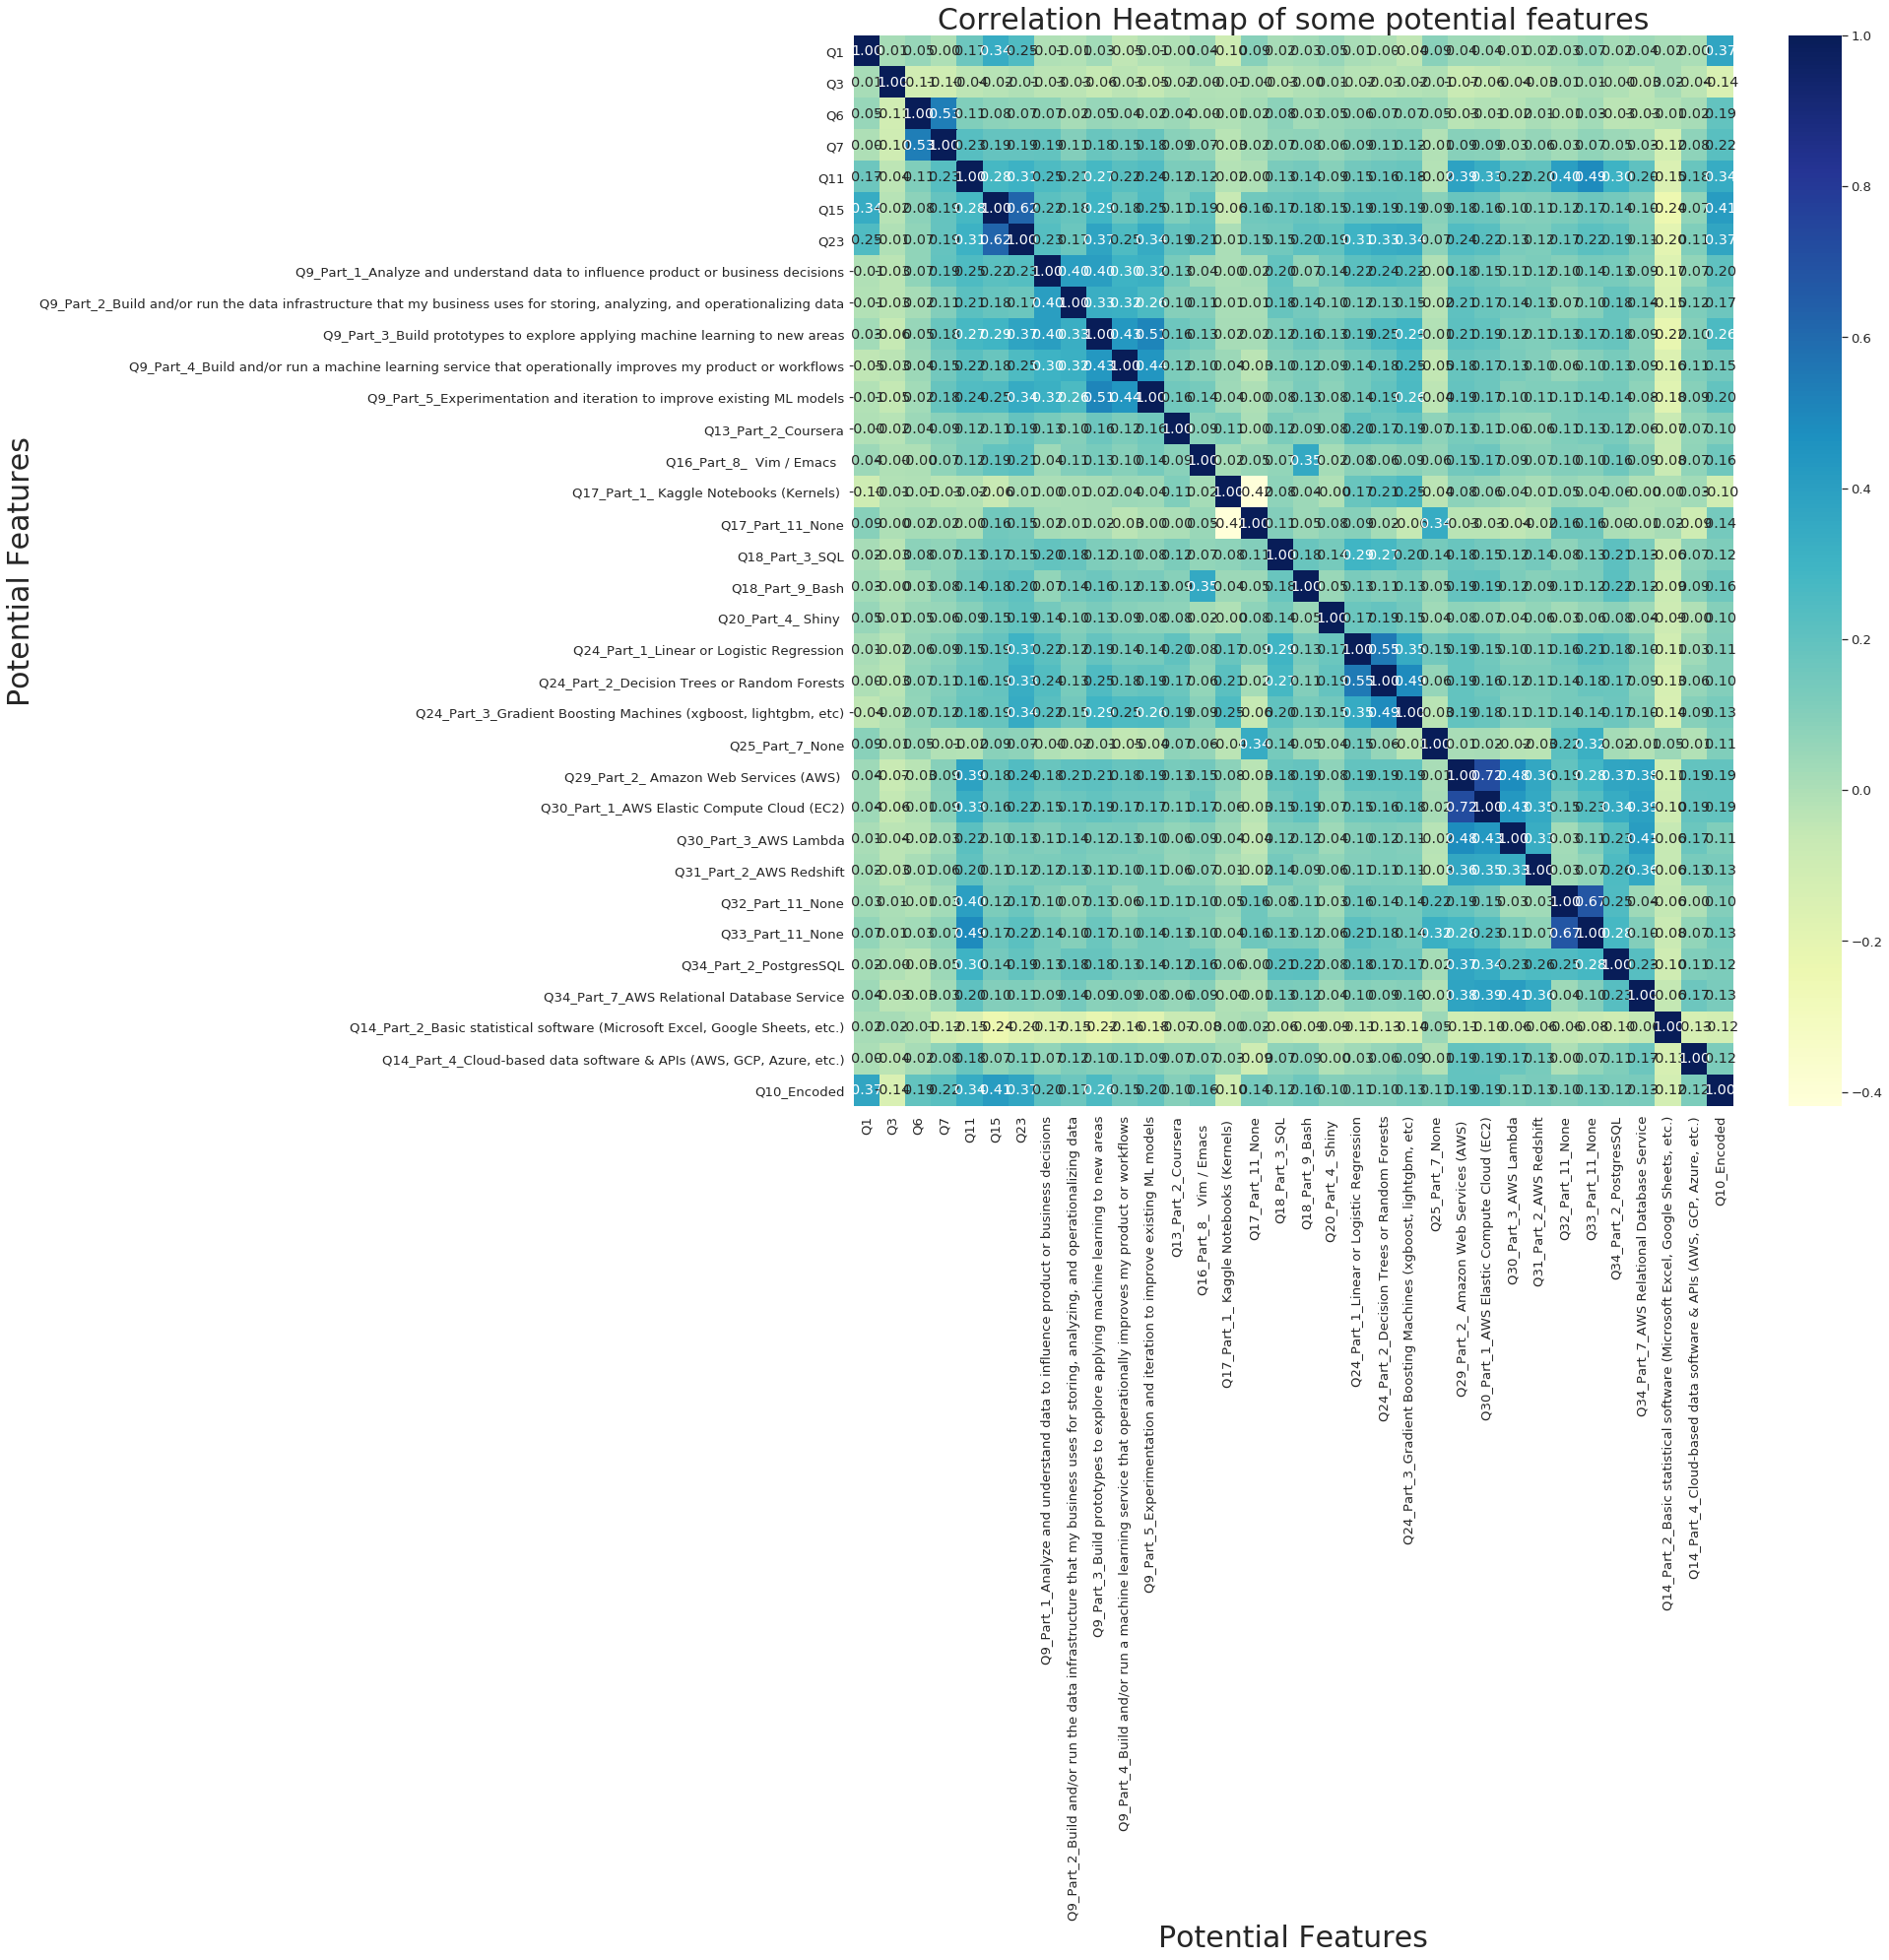

In [ ]:
#get correlations of each features in dataset
corrmat = df_encoded_final_label.iloc[:,0:-1].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Correlation with output variable
cor_target = abs(corrmat['Q10_Encoded'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
print('Correlation Matrix picked these features count = ', len(relevant_features))


# ploting heat map

g=sns.heatmap(df_encoded_final_label.iloc[:,0:-1][pd.Series(relevant_features.index.values)].corr(),annot=True,
             fmt='.2f', cmap="YlGnBu")
g.set_title("Correlation Heatmap of some potential features", fontsize=30)
g.set_xlabel("Potential Features",fontsize=30)
g.set_ylabel("Potential Features",fontsize=30)

### Observation:

We see that
- Q1 - What is your age (# years)?
- Q11 - Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
- Q15 - How long have you been writing code to analyze data (at work or at school)?
- Q23 - For how many years have you used machine learning methods?

Have **correlation** with salary encoded of **more than 30%**


In [ ]:
print('Features picked are = \n', relevant_features)

Features picked are = 
 Q1                                                                                                                            0.370352
Q3                                                                                                                            0.144636
Q6                                                                                                                            0.193800
Q7                                                                                                                            0.222678
Q11                                                                                                                           0.339666
Q15                                                                                                                           0.412654
Q23                                                                                                                           0.373715
Q9_Part_1_Analyze and understan

### HOWEVER....

**LabelEncoder** can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

**One-Hot-Encoding has the advantage** that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature.

### b) Approach_b - One hot encoding the remaining nominal categorical data

In [ ]:
## The columns to label encod
ques_to_onehot = df_encoded_final_onehot.select_dtypes(include=['object']).columns
ques_to_onehot = set(ques_to_onehot)-set(['Q10_buckets'])

ques_to_onehot

{'Q2', 'Q3', 'Q4', 'Q5', 'Q8'}

In [ ]:
## one hot encoding all the above columns except 'Q10_buckets'

df_encoded_final_onehot = pd.get_dummies(df_encoded_final_onehot, columns = ques_to_onehot)

In [ ]:
## rearranging the columns to move features q10_encoded and q10_buckets to the end

df_encoded_final_onehot = df_encoded_final_onehot[[c for c in df_encoded_final_onehot if c not in ['Q10_Encoded', 'Q10_buckets']] 
       + ['Q10_Encoded', 'Q10_buckets']]

In [ ]:
X_approach_b = df_encoded_final_onehot.iloc[:,0:-2]  #independent columns
y_approach_b = df_encoded_final_onehot.iloc[:,-2]    #target column i.e salary encoded range

### Feature Selection by Decision Trees - Random Forest using approach b)

Random forests consist of 4 –12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure” each of the buckets is.

Source: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [ ]:
randomforestselect_approach_b = SelectFromModel(RandomForestClassifier(n_estimators = 100))
randomforestselect_approach_b.fit(X_approach_b, y_approach_b)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [ ]:
randomf_selected_feat_apporach_b = X_approach_b.columns[(randomforestselect_approach_b.get_support())]
print('No. of selected features by random forest are = ', len(randomf_selected_feat_apporach_b))
print('\n fetures names are:\n', randomf_selected_feat_apporach_b)

No. of selected features by random forest are =  108

 fetures names are:
 Index(['Q1', 'Q6', 'Q7', 'Q11', 'Q15', 'Q22', 'Q23',
       'Q9_Part_1_Analyze and understand data to influence product or business decisions',
       'Q9_Part_2_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Q9_Part_3_Build prototypes to explore applying machine learning to new areas',
       ...
       'Q8_No (we do not use ML methods)',
       'Q8_We are exploring ML methods (and may one day put a model into production)',
       'Q8_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q8_We recently started using ML methods (i.e., models in production for less than 2 years)',
       'Q8_We use ML methods for generating insights (but do not put working models into production)',
       'Q3_Canada', 'Q3_Germany', 'Q3_India',
       'Q3_United Kingdom of Great Britain and Northern Ireland',
    

### Observations:

**Few of the limitations of Random forest are :**

Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.
Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ).

We **cannot Use Decision Tree based feature selection techniques** as Categorical variables are naturally disadvantaged in this case and have only a few options for splitting which results in very sparse decision trees. The situation gets worse in variables that have a small number of levels and one-hot encoding falls in this category with just two levels. The trees generally tend to grow in one direction because at every split of a categorical variable there are only two values (0 or 1). The tree grows in the direction of zeroes in the dummy variables. Follow the image below closely.

**Decision_tree_without_one-hot encoding**
<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/Decision_tree_without_one-hot.png" width="500"/>

**Decision_tree_with_one-hot encoding**
<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/Decision_tree_with_one-hot.png" width="500"/>


Source: https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

### Feature Selection by Lasso Regression using approach b)

The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as - 

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/lasso_equation.png" width="600"/>

Just like Ridge regression cost function, for lambda =0, the equation above reduces to equation 1.2. The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. 

Source: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [ ]:
col_feat_b = X_approach_b.columns

# Initializing the Lasso variable and fitting it with out feature and target data. Choose a random value of alpha here for now
model_lasso_b = Lasso(alpha = 0.01, random_state=5).fit(X_approach_b,y_approach_b)

# Using .coef_ attribute to give a correlation between the features
coef_b = pd.Series(model_lasso_b.coef_, index = X_approach_b.columns)
print (coef_b.head())

# Eliminate the features whose correlation value is 0 and keep the other features
print("\nLasso picked " + str(sum(coef_b != 0)) + " variables and eliminated the other " +  str(sum(coef_b == 0)) + " variables\n")

# Initializing SelectFromModel to easily select the features from our Lasso Model
sfm_b = SelectFromModel(model_lasso_b)

# Training the selector on our feature and target data
sfm_b.fit(X_approach_b, y_approach_b)

# Print the names of the most important features
for feature_list_index in sfm_b.get_support(indices=True):
    print(col_feat_b[feature_list_index])

# New feature data with selected features stored here
feature_data_selected_b=X_approach_b[X_approach_b.columns[(sfm_b.get_support())]]


Q1     0.316350
Q6     0.211342
Q7     0.044182
Q11    0.398477
Q15    0.249107
dtype: float64

Lasso picked 102 variables and eliminated the other 186 variables

Q1
Q6
Q7
Q11
Q15
Q22
Q23
Q9_Part_1_Analyze and understand data to influence product or business decisions
Q9_Part_3_Build prototypes to explore applying machine learning to new areas
Q9_Part_6_Do research that advances the state of the art of machine learning
Q9_Part_7_None of these activities are an important part of my role at work
Q13_Part_2_Coursera
Q13_Part_3_edX
Q13_Part_4_DataCamp
Q13_Part_6_Kaggle Courses (i.e. Kaggle Learn)
Q13_Part_7_Fast.ai
Q13_Part_8_Udemy
Q13_Part_10_University Courses (resulting in a university degree)
Q13_Part_12_Other
Q16_Part_2_ RStudio 
Q16_Part_4_ Atom 
Q16_Part_5_ MATLAB 
Q16_Part_6_ Visual Studio / Visual Studio Code 
Q16_Part_7_  Spyder  
Q16_Part_8_  Vim / Emacs  
Q16_Part_9_  Notepad++  
Q16_Part_10_  Sublime Text  
Q17_Part_1_ Kaggle Notebooks (Kernels) 
Q17_Part_2_ Google Colab 
Q17_

### Moving forward with Lasso Regression -

Selecting Lasso regression and moving ahead with feature selection. **We have eliminated the features irrelevant to our target variable. Now, we move on to Scaling our Data and PCA to reduce the dimensionality**

## 3.1.3 Performing Standard Scaling and PCA

Logistic Regression model performance may be negatively affected by high cardinality, hence to further reduce features obtained from Lasso Regression we'll perform PCA, but first we need to scale the data to perform PCA

**Performing Standard Scaling:**

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization

StandardScaler function standardizes features by removing the mean and scaling to unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

Source: https://en.wikipedia.org/wiki/Feature_scaling

**Principal Component Analysis:**

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set.

PCA is sensitive to the relative scaling of the original variables. Hence, we perform Standard Scaling first to prevent the sensitivity

Source: https://en.wikipedia.org/wiki/Principal_component_analysis

In [ ]:
# Initializing the StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(feature_data_selected_b)

# Taking 99% explained variance from the Scaled and Selected feature dataset = reason is mentioned in the upcomming cells

pca = PCA(n_components=0.95,random_state=0)
X = DataFrame(pca.fit_transform(data))

X.shape   # This is the Scaled and Dimensionally-reduced feature dataset

(12497, 86)

In [ ]:
y = y_approach_b # Target data = the encoded salaries
y.shape

(12497,)

#### Reason for PCA n_components as 0.95 or 95%

Final value of cumunlative explained variance is =  95.22339592928333 %


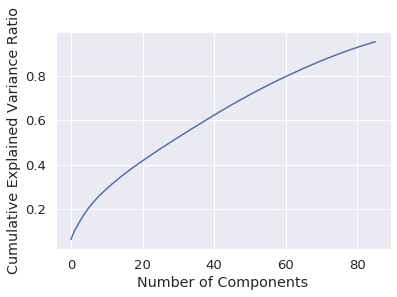

In [ ]:
# plotting explained variance vs number of components - 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

print('Final value of cumunlative explained variance is = ', np.cumsum(pca.explained_variance_ratio_)[-1]*100, '%')

### Observation:

It is evident from the graph that as we increase the number of components, the cumulative explained variance always increases. Thus, accuracy increases as we increase number of components. Hence to get the maximum accuracy of our model, we choose 95% of components where we obtained 95.22% explained variance.

## 4. MODEL IMPLIMENTATION  ---------------------------------------------------------------------------------------

**Splitting the data into training and testing data** 30% testing and 70% training 

**Using stratify** This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101, stratify=y)

### Now following the lecture example of multiclass logistic regression of ordinal salary classes -

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/Multi_class_logistic_lecture_1.jpg" width="600"/>

Source: MIE1624 Lecture slides

In [ ]:
### We will run the logistic regression on the same principle as stated above and defined earlier as a function in section 0 -

#### Keeping the logistic regression parameters as - (Untuned)

- **solver** = 'saga' as it works well with small data set 
- **penalty** = 'l2'
- **C** = '1' (Default for all 14 mid)

#### Using 'saga' solver for logitic regression

The ‘saga’ solver supports both L1 and L2 regularization, and is faster than the rest for large data sets
(source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

#### Using Regularization 'l2' for logistic regression

Regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. L1-norm does not have an analytical solution, but L2-norm does. This allows the L2-norm solutions to be calculated computationally efficiently. However, L1-norm solutions does have the sparsity properties which allows it to be used along with sparse algorithms, which makes the calculation more computationally efficient.

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/l2_vs_l1.jpg" width="500"/>

Source: http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/

### Model Accuracy, Precision, Recall and F1 Score

#### Accuracy

In binary classification, accuracy is defined as:

$$accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

**In multi-class classification, TN, FP and FN are not well defined as there are 15 classes.** 
Accuracy in this case is:

$$accuracy = \frac{correct\ predictions}{samples}$$

We can evaluate the accuracy using the `accuracy_score` function from `sklearn.metrics`

#### Recall
For one class, how many of the class samples did the model find in the testing set and correctly identify:

$$Recall = \frac{TP}{TP + FN}$$
#### Precision 

For one class, of all the samples predicted as that class, how many were correct predictions:

E.g, for virginica, we have perfect recall so our model found and made correct predictions on all virginica samples but it also has less than perfect percision because it predicted samples belonging to other classes as virginica.

There were are total of 12 virginica predictions: 12/0.86 = 14,
12 of which were TP so 2 were incorrect predictions (FP).

$$Precision = \frac{TP}{TP + FP}$$

#### F1-Score

When you want to take both recall and precision into consideration, you could use the F1-score.

The F1-score, or F-measure, is a metric that considers both precision and recall. It is defined as:

$$F1-score = \frac{2}{\frac{1}{R1ecall} + \frac{1}{Precision}}$$

### Observation:

In multi-class classification, TN, FP and FN are not well defined as there are 15 classes. Hence we would focus on accuracy and confusion matrix to evaluate our model

Source: Tutorial and Lecture Material

## 4.1 Finding the salary class probabilities on test data by implimenting ordinal logistic regression and testing on testing data

In [ ]:
# Finding the probabilities by implimenting ordinal logistic regression by calling function from 'section 0'

model_prob_df = ordinal_salary_logistic_regression(X_train, X_test, y_train, solver='saga',
                                                   C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], penalty='l2', max_iter=5000)

In [ ]:
# Exploring the data frame of probabilities of salary classes obtained on X_test
model_prob_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.534806,0.320482,0.073809,0.044036,0.012481,0.005426,0.002485,0.000250,0.000186,0.000581,0.003382,0.001111,0.000663,0.000099,0.000202
1,0.027795,0.010094,0.014083,0.032969,0.067970,0.073237,0.137786,0.147906,0.068362,0.057629,0.246210,0.061130,0.028922,0.021757,0.004151
2,0.125664,0.044802,0.073518,0.085224,0.097761,0.090050,0.090714,0.106645,0.018341,0.037799,0.139372,0.056812,0.014597,0.007816,0.010887
3,0.162372,0.058457,0.092142,0.164337,0.213221,0.132103,0.100124,0.039005,0.015509,0.010427,0.003132,0.006504,0.001696,0.000653,0.000318
4,0.516679,0.267412,0.120542,0.043388,0.015949,0.012928,0.006590,0.007721,0.002421,0.001367,0.000903,0.000079,0.001672,0.001577,0.000771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.044004,0.037662,0.039952,0.070035,0.104926,0.113941,0.112828,0.161053,0.058119,0.050432,0.152292,0.036466,0.009508,0.005823,0.002958
3746,0.514830,0.292148,0.106116,0.034799,0.010520,0.015840,0.012063,0.007238,0.001450,0.001697,0.001703,0.000598,-0.000527,0.000806,0.000721
3747,0.019053,0.023371,0.028542,0.047681,-0.019585,0.050889,0.047622,0.106907,0.103812,0.077671,0.193838,0.232026,0.033833,0.011995,0.042345
3748,0.287514,0.199830,0.146324,0.158482,0.080874,0.052392,0.025092,0.015638,0.004895,0.004084,0.014706,0.002585,0.005173,0.001127,0.001283


In [ ]:
# checking for negative values in the above data frame

_, min_negative_model_prob_df, max_negative_model_prob_df = negative_count_df(model_prob_df)

print('The minimum and maximum negative probabilities lie between', min_negative_model_prob_df, 'and', 
      max_negative_model_prob_df)

The minimum and maximum negative probabilities lie between -0.144645273254702 and -1.0451639553821224e-12


### Observation:

There are a few negative probabilites in our data frame. **Normalising the dataframe** so as to make the little -ve values to 0 and ensuring the sum of all probabilites to be 1. Since the negative probabilites are too small, we can make them 0

#### Normalising the dataframe

In [ ]:
# noramlising the probabilities

model_prob_df_zero_elem = model_prob_df.mask(model_prob_df<0, 0) # making -ve probabilites as 0
model_prob_df_normalised = model_prob_df_zero_elem.div(model_prob_df_zero_elem.sum(axis=1), axis=0)
model_prob_df_normalised

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.534806,0.320482,0.073809,0.044036,0.012481,0.005426,0.002485,0.000250,0.000186,0.000581,0.003382,0.001111,0.000663,0.000099,0.000202
1,0.027795,0.010094,0.014083,0.032969,0.067970,0.073237,0.137786,0.147906,0.068362,0.057629,0.246210,0.061130,0.028922,0.021757,0.004151
2,0.125664,0.044802,0.073518,0.085224,0.097761,0.090050,0.090714,0.106645,0.018341,0.037799,0.139372,0.056812,0.014597,0.007816,0.010887
3,0.162372,0.058457,0.092142,0.164337,0.213221,0.132103,0.100124,0.039005,0.015509,0.010427,0.003132,0.006504,0.001696,0.000653,0.000318
4,0.516679,0.267412,0.120542,0.043388,0.015949,0.012928,0.006590,0.007721,0.002421,0.001367,0.000903,0.000079,0.001672,0.001577,0.000771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.044004,0.037662,0.039952,0.070035,0.104926,0.113941,0.112828,0.161053,0.058119,0.050432,0.152292,0.036466,0.009508,0.005823,0.002958
3746,0.514559,0.291994,0.106060,0.034781,0.010515,0.015831,0.012056,0.007234,0.001449,0.001696,0.001702,0.000598,0.000000,0.000805,0.000720
3747,0.018687,0.022922,0.027994,0.046765,0.000000,0.049911,0.046707,0.104854,0.101818,0.076179,0.190114,0.227569,0.033183,0.011765,0.041532
3748,0.287514,0.199830,0.146324,0.158482,0.080874,0.052392,0.025092,0.015638,0.004895,0.004084,0.014706,0.002585,0.005173,0.001127,0.001283


In [ ]:
# predicting y from testing data by the model and checking if normalisation had any affect on the output

y_pred = predict_proba_ordinal_salary_logistic_regression(model_prob_df_normalised)
y_pred_not_normalised = predict_proba_ordinal_salary_logistic_regression(model_prob_df)

count_false = 0
testing = y_pred == y_pred_not_normalised
for i in testing.iloc[:,0]:
    if i == 'False':
        count_false = count_false + 1
        
print("y predict from original and normalised prob. dataframe have class mismatch of = ", count_false)

y predict from original and normalised prob. dataframe have class mismatch of =  0


In [ ]:
## concatnating the y predict with probability data frame

model_prob_df_normalised['Predicted_classes'] = y_pred
model_prob_df_normalised

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Predicted_classes
0,0.534806,0.320482,0.073809,0.044036,0.012481,0.005426,0.002485,0.000250,0.000186,0.000581,0.003382,0.001111,0.000663,0.000099,0.000202,0
1,0.027795,0.010094,0.014083,0.032969,0.067970,0.073237,0.137786,0.147906,0.068362,0.057629,0.246210,0.061130,0.028922,0.021757,0.004151,10
2,0.125664,0.044802,0.073518,0.085224,0.097761,0.090050,0.090714,0.106645,0.018341,0.037799,0.139372,0.056812,0.014597,0.007816,0.010887,10
3,0.162372,0.058457,0.092142,0.164337,0.213221,0.132103,0.100124,0.039005,0.015509,0.010427,0.003132,0.006504,0.001696,0.000653,0.000318,4
4,0.516679,0.267412,0.120542,0.043388,0.015949,0.012928,0.006590,0.007721,0.002421,0.001367,0.000903,0.000079,0.001672,0.001577,0.000771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.044004,0.037662,0.039952,0.070035,0.104926,0.113941,0.112828,0.161053,0.058119,0.050432,0.152292,0.036466,0.009508,0.005823,0.002958,7
3746,0.514559,0.291994,0.106060,0.034781,0.010515,0.015831,0.012056,0.007234,0.001449,0.001696,0.001702,0.000598,0.000000,0.000805,0.000720,0
3747,0.018687,0.022922,0.027994,0.046765,0.000000,0.049911,0.046707,0.104854,0.101818,0.076179,0.190114,0.227569,0.033183,0.011765,0.041532,11
3748,0.287514,0.199830,0.146324,0.158482,0.080874,0.052392,0.025092,0.015638,0.004895,0.004084,0.014706,0.002585,0.005173,0.001127,0.001283,0


### Observation:

normalising the probability data frame has no affect on the y predictions

## 4.2 Exploring the dataframe of salary class probabilities

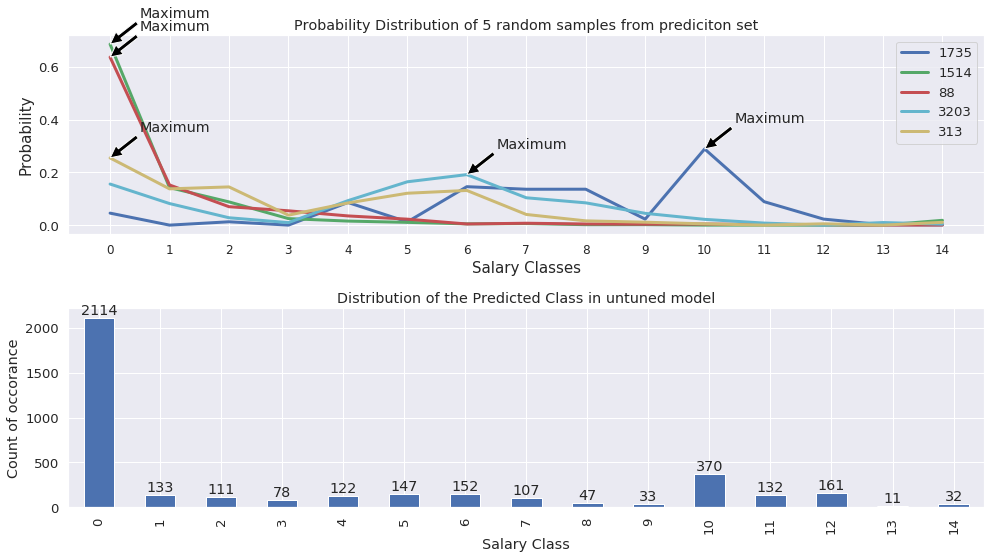

In [ ]:
## plotting probability distribution of 5 random sample sets

random.seed(1624)
rand_samples = random.randint(0, model_prob_df_normalised.shape[0], 5)
color_rand = ['b','g','r','c','y']

plt.figure(figsize=(15,5))

plt.subplot(2,1,1)
for j in range(0,5):
    plt.plot(model_prob_df_normalised.iloc[rand_samples[j],:-1], marker='', color=color_rand[j], linewidth=3, 
             label = rand_samples[j])
    plt.xticks(np.arange(0,15,1), rotation=0, fontsize=12)
    plt.xlabel('Salary Classes', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.title('Probability Distribution of 5 random samples from prediciton set')
    ymax = max(model_prob_df_normalised.iloc[rand_samples[j],:-1])
    xmax = model_prob_df_normalised.iloc[rand_samples[j],:-1].idxmax()
    plt.annotate('Maximum', xy=(xmax, ymax), xytext=(xmax+0.5, ymax+0.1), 
                arrowprops=dict(facecolor='black', shrink = 0.005, frac=0.1))
plt.legend()
    
#Distribution of the Predicted Class in untuned model
plt.subplot(2,1,2)
ax10 = y_pred.iloc[:,0].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each salary class",
                                    sort_columns = 'ascending')
ax10.set_xlabel("Salary Class")
ax10.set_ylabel("Count of occorance")
ax10.set_title ('Distribution of the Predicted Class in untuned model')

x_labels_untuned = y_pred.iloc[:,0].value_counts().sort_index().values
labels_untuned = ["%d" % i for i in x_labels_untuned]
rects_untuned = ax10.patches
for rect, label in zip(rects_untuned, labels_untuned):
    height = rect.get_height()
    ax10.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.tight_layout()

### Observation:

from the **Probability Distribution of 5 random samples from prediciton set** and **Distribution of the Predicted Class in untuned model** it appears that most of the probabilities are centered around class 0

## 4.3 Model Accuracy and Confusion Matrix (36.480% - accuracy)

### Accuracy

In binary classification, accuracy is defined as:

$$accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

**In multi-class classification, TN, FP and FN are not well defined as there are 15 classes.** 
Accuracy in this case is:

$$accuracy = \frac{correct\ predictions}{samples}$$

We can evaluate the accuracy using the `accuracy_score` function from `sklearn.metrics`

#### Recall
For one class, how many of the class samples did the model find in the testing set and correctly identify:

$$Recall = \frac{TP}{TP + FN}$$

#### Precision 

For one class, of all the samples predicted as that class, how many were correct predictions:

$$Precision = \frac{TP}{TP + FP}$$

#### F1-Score

When you want to take both recall and precision into consideration, you could use the F1-score.

The F1-score, or F-measure, is a metric that considers both precision and recall. It is defined as:

$$F1-score = \frac{2}{\frac{1}{R1ecall} + \frac{1}{Precision}}$$

## From here on we will use accuracy and f1 score as together they would give a holistic feature of our model especially in case of multi class classification where precision and recall are ill defined

In [ ]:
# Accuracy score

untuned_accuracy = accuracy_score(y_test,y_pred)
print('the untuned model accuracy on testing data is = ',"{0:.3%}".format(untuned_accuracy))

the untuned model accuracy on testing data is =  36.480%


In [ ]:
f1_untuned = f1_score(y_test,y_pred, average = 'weighted')
prec_untuned = precision_score(y_test,y_pred, average = 'weighted')
recall_untuned = recall_score(y_test,y_pred, average = 'weighted')

print('Untuned F1 Score is ', "{0:.3%}".format(f1_untuned))
print('untuned precision is ', "{0:.3%}".format(prec_untuned))
print('untuned recall is ',"{0:.3%}".format(recall_untuned) )

Untuned F1 Score is  29.684%
untuned precision is  28.639%
untuned recall is  36.480%


### Normalized Confusion Matrix

A row represents an instance of the actual class (i.e. an actual surgical step), whereas a column represents an instance of the predicted class (i.e. the predicted surgical step). Consequently, the values of the diagonal elements represent the degree of correctly predicted classes. The confusion is expressed by the false classified offdiagonal elements, since they are mistakenly confused with another class. 

Source: https://www.researchgate.net/figure/Normalized-Confusion-Matrix-A-row-represents-an-instance-of-the-actual-class-ie-an_fig1_308074430

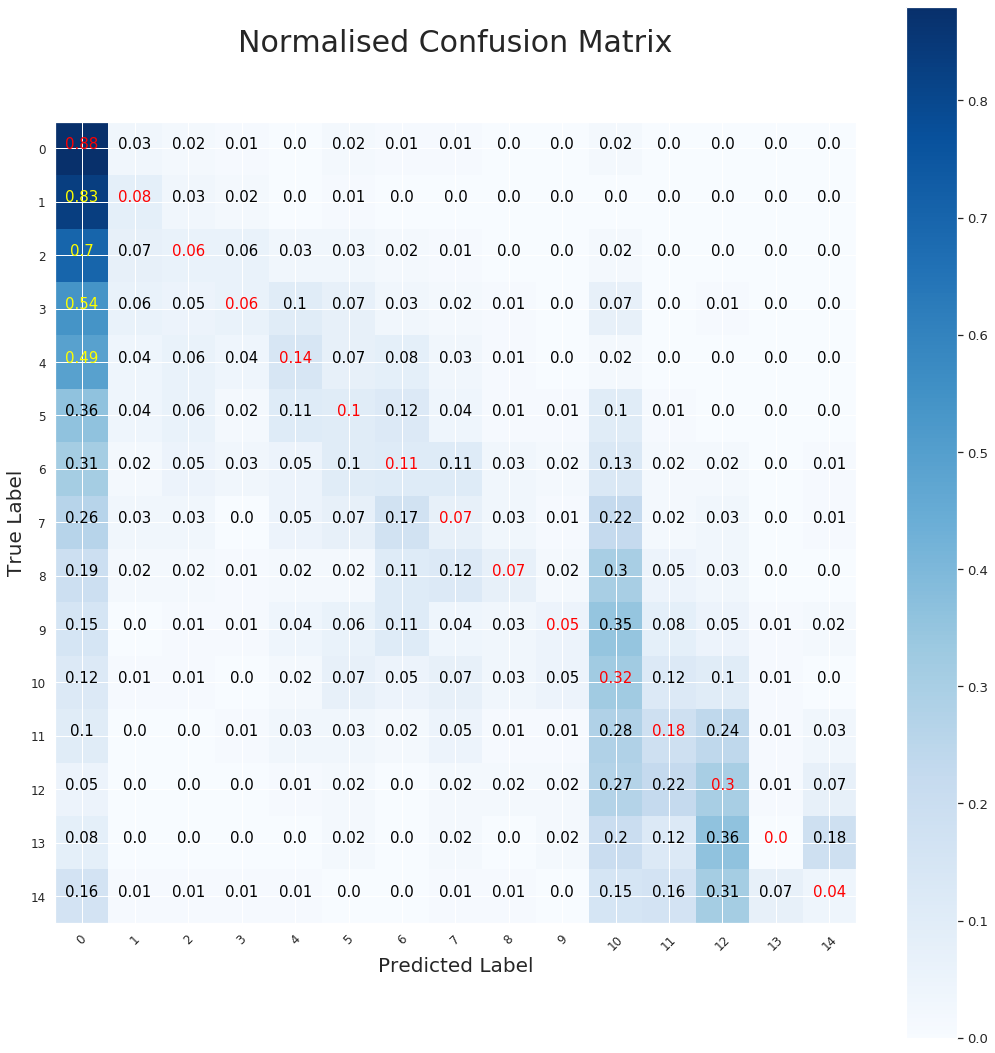

In [ ]:
# Computing the confusion matrix normalised

cm_matrix = confusion_matrix(y_test,y_pred)
cm_matrix = cm_matrix.astype('float') / cm_matrix.sum(axis=1)[:, np.newaxis] #normalization of confusion matrix
cm = np.around(cm_matrix, decimals=2)

plt.figure(figsize=(15,15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalised Confusion Matrix', fontsize=30, y=1.08)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks, fontsize=12)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'
        if cm[i][j] > 0.4:
            color = 'yellow'
        if i == j:
            color = 'red'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
        
plt.tight_layout()


### Observation:

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/Confusion_matrix_1.png" width="500"/>

As observed through the diagonal elements, which represent the degree of correctly predicted classes, apart from class 0, all the other classes performed poorly with less that 14% correctly predicted labels. Especially class 13, which has 0% true positives and most of it is being predicted as label 12. Hence the model needs tuning. Also the incorrect predictions are spread across all the classes. Hence the model suffers from **high bias**

Also, seeing the high rate of false negatives for true label 1,2,3 and 4 being predicted as 0 (83%), hence the confusion matrix suggests that **the model is highly biased towards class 0.**

## 4.4 Cross validation for training and testing accuracy of the model over 10 folds of training data

**Implementing 10 fold Cross validation** - KFold Cross Validation is a common method where the training set is split into k equal sizes. Then of the k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. This process continues k times, and each time a different sample is used for testing. This results in each sample being tested once. At the end of this we get 10 accuracies for the model and, from this, we can get the average accuracy, and the standard deviation of the accuracy. The higher the average accuracy, the lower the bias. The lower the standard deviation, the lower the variance. This better represents the true performance of the model on the training set.

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/grid_search_cross_validation.png" width="600"/>

source: https://scikit-learn.org/stable/modules/cross_validation.html

**training and testing accuracy**

Metrics on the training set let you see how your model is progressing in terms of it's training, but it's metrics on the validation set that let you get a measure of the quality of your model - how well it's able to make new predictions based on data it hasn't seen before.

In [ ]:
# performing 10 fold cross validation

accuracy_test, accuracy_train, recall, precision, f1_score = cross_validation(X_train, y_train, 
                                                                              n_splits=10, solver='saga', 
                                                                              C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], penalty='l2', 
                                                                              max_iter=5000)

Testing Accuracy is = 
 [0.35657143 0.35085714 0.37028571 0.37142857 0.38628571 0.36914286
 0.36114286 0.36727689 0.36270023 0.38215103]
Mean of Testing Accuracy is =  0.3677842432167375 with standard deviation of = 0.010259434019090144

Training Accuracy is = 
 [0.40256606 0.40625    0.39989837 0.4011687  0.39850102 0.39799289
 0.40218496 0.3999746  0.40302299 0.40327702]
Mean of Training Accuracy is =  0.4014836601294534 with standard deviation of = 0.010259434019090144

Recall is = 
 [0.35657143 0.35085714 0.37028571 0.37142857 0.38628571 0.36914286
 0.36114286 0.36727689 0.36270023 0.38215103]
Mean of Recall is =  0.3677842432167375 with standard deviation of = 0.010259434019090144

precision is = 
 [0.27755828 0.27238069 0.29859912 0.30100175 0.30692732 0.27644902
 0.27300009 0.29718187 0.27892286 0.30976879]
Mean of precision is =  0.28917897867103126 with standard deviation of = 0.014063165934364777

f1_score is = 
 [0.3121423  0.30667814 0.33060098 0.33252709 0.34206408 0.31614

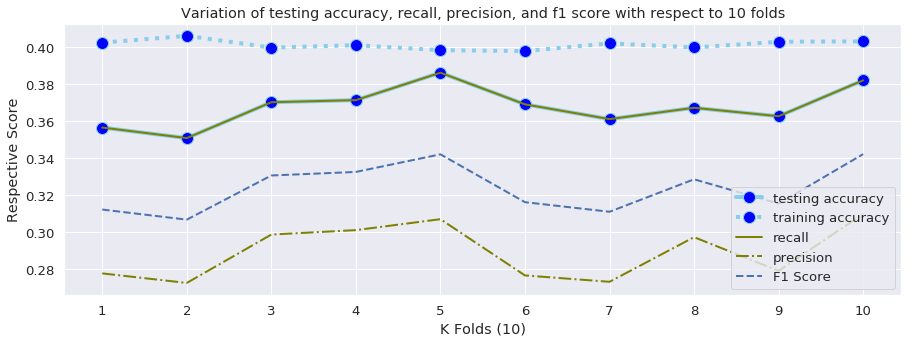

In [ ]:
# plotting the change in testing accuracy, recall, precision, and f1 score with respect to K folds
kfolds_1 = np.arange(1,11,1)

plt.figure(figsize=(15,5))
plt.plot( kfolds_1, accuracy_test, marker='o', markerfacecolor='blue', markersize=12, color='skyblue',
         linewidth=4, label = 'testing accuracy')
plt.plot( kfolds_1, accuracy_train, marker='o', linestyle=':', markerfacecolor='blue', markersize=12, color='skyblue',
         linewidth=4, label = 'training accuracy')
plt.plot( kfolds_1, recall, marker='', color='olive', linewidth=2, label = 'recall')
plt.plot( kfolds_1, precision, marker='', color='olive', linewidth=2, linestyle='-.', label='precision')
plt.plot( kfolds_1, f1_score, marker='', color='b', linewidth=2, linestyle='dashed', label='F1 Score')
plt.xticks(np.arange(1,11))

plt.xlabel("K Folds (10)")
plt.ylabel("Respective Score")
plt.title("Variation of testing accuracy, recall, precision, and f1 score with respect to 10 folds")

plt.legend()

print('Testing Accuracy is = \n', accuracy_test)
print('Mean of Testing Accuracy is = ', np.mean(accuracy_test), 'with standard deviation of =', np.std(accuracy_test))

print('\nTraining Accuracy is = \n', accuracy_train)
print('Mean of Training Accuracy is = ', np.mean(accuracy_train), 'with standard deviation of =', np.std(accuracy_test))

print('\nRecall is = \n', recall)
print('Mean of Recall is = ', np.mean(recall), 'with standard deviation of =', np.std(recall))

print('\nprecision is = \n', precision)
print('Mean of precision is = ', np.mean(precision), 'with standard deviation of =', np.std(precision))

print('\nf1_score is = \n', f1_score)
print('Mean of f1_score is = ', np.mean(f1_score), 'with standard deviation of =', np.std(f1_score))

### Observation:

The Mean **Accuracy** of the untuned model is 36.89 % with std of 1.200 %

The Mean **F1 Score** of the untuned model is 32.51 % with std of 1.557 %

## 4.5 Model Evaluation with Learning Curve (Bias Variance Tradeoff)

### The bias-variance trade-off

In supervised learning, we assume there’s a real relationship between feature(s) and target and estimate this unknown relationship with a model. Provided the assumption is true, there really is a model, which we’ll call , which describes perfectly the relationship between features and target.

In practice,  is almost always completely unknown, and we try to estimate it with a model  (notice the slight difference in notation between  and ). We use a certain training set and get a certain . If we use a different training set, we are very likely to get a different . As we keep changing training sets, we get different outputs for . The amount by which  varies as we change training sets is called variance.

If the training error is very low, it means that the training data is fitted very well by the estimated model. If the model fits the training data very well, it means it has low bias with respect to that set of data. If the training error is high, it means that the training data is not fitted well enough by the estimated model. If the model fails to fit the training data well, it means it has high bias with respect to that set of data.

The relationship between the training and validation error, and the gap can be summarized this way: validation error - training error  So the bigger the difference between the two errors, the bigger the gap. The bigger the gap, the bigger the variance. In our case, the gap is very narrow, so we can safely conclude that the variance is low. High training MSE scores are also a quick way to detect low variance. If the variance of a learning algorithm is low, then the algorithm will come up with simplistic and similar models as we change the training sets. Because the models are overly simplified, they cannot even fit the training data well (they underfit the data). So we should expect high training MSEs. Hence, high training MSEs can be used as indicators of low variance.

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/learnig_curve_analysis.png" width="1200"/>


### About classification problem with reference to this assignment

For classification tasks, the workflow is almost identical. The main difference is that we’ll have to choose another error metric – one that is suitable for evaluating the performance of a classifier. Unlike what we’ve seen so far, notice that the learning curve for the training error is above the one for the validation error. This is because the score used, accuracy, describes how good the model is. The higher the accuracy, the better. 

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/CLASSIFICATIO_LEARNING_CURVE_ACCURACY-EXAMPLE.png" width="500"/>

Source: https://www.dataquest.io/blog/learning-curves-machine-learning/

### Implimenting the learning curve function -

In [ ]:
train_acc_mean_df, train_acc_meanstd_df, testing_acc_mean_df, testing_acc_meanstd_df = learning_curve(X, y, test_sizes = [0.90, 0.75, 0.60, 0.45, 0.30, 0.15], n_splits=5, 
                                       solver ='saga', C=[1,1,1,1,1,1,1,1,1,1,1,1,1,1], penalty='l2', max_iter=5000)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

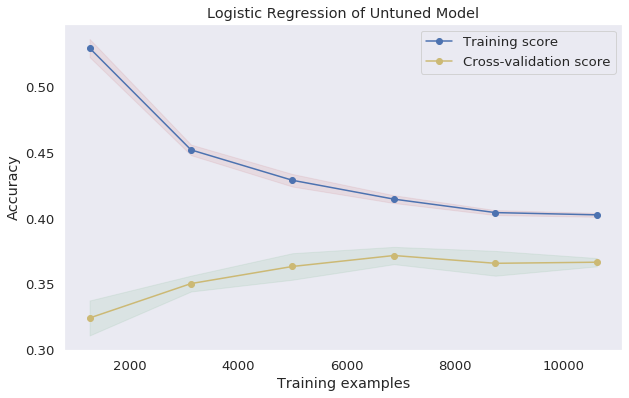

In [ ]:
plot_learning_urve(train_acc_mean_df, train_acc_meanstd_df, testing_acc_mean_df, 
                    testing_acc_meanstd_df, title = 'Logistic Regression of Untuned Model')

### Observation

As our learning curve has a gap of just 0.04 approx (difference of accuracy with largest training size), and low testing (cross-validation) accuracy. Hence our **model is suffering from high bias ( or low accuracy)**. Predicted data points are far from the target. Also, the model suggests more assumptions about the form of the target function. The cross validation accuracy comes to about 36.5% approxonly (testing accuracy)

Also, the model **has Low Variance**: the model Suggests small changes to the estimate of the target function with changes to the training dataset. Hence the model could be **underfit**

High bias and low variance definition source: https://towardsdatascience.com/tradeoffs-how-to-aim-for-the-sweet-spot-c20b40d5e6b6

## 5. MODEL TUNING ------------------------------------------------------------------------------------------------------

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/L2_EQUATION_LOGISTIC.png" width="300"/>

Here, if lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.

### Hyper-parameters used in this model are

a) **Lasso-Feature-Selection**
    - alpha = 0.1

b) **Multi-Class-Ordinal-Logistic-Regression**
    - solver = 'saga'
    - C = 1

## 5.1 Lasso-Feature-Selection Tuning
    - alpha = [0.01,0.05,0.1,0.5,1,5]

### Grid searching of hyperparameters:

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. using **GridSearchCV**

<img src="pictures_assignemnt_1_mie1624_Gautam_Dawar/grid_vs_random_search.png" width="700"/>

Source: https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models

In [ ]:
lasso_tuned = Lasso(max_iter=1000)   # Initializing a Lasso variable to tune and optimize

parameters = {'alpha': [0.01,0.05,0.1,0.5,1,5]}   # setting up parameters to vary for alpha

lasso_regressor = GridSearchCV(lasso_tuned, parameters, cv = 5,verbose=True)  # Initializing the GridSearchCV

lasso_regressor.fit(X_approach_b, y_approach_b)  # Fitting the gridsearch model with feature and target data

print (lasso_regressor.best_score_,lasso_regressor.best_params_)   # Printing the best score and best parameter

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5665321367725368 {'alpha': 0.01}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.9s finished


### now are Lasso regressor is already tuned with alpha 0.01, now we can move onto tuning of Multi-Class-Ordinal-Logistic-Regression

## 5.2 Multi-Class-Ordinal-Logistic-Regression Tuning

- solver = 'saga'
- C = [0.01,0.05,0.1,0.5,1,5]

### Implementing the hyper parameter tuning with grid search on indiviudal logistic regression model

In [ ]:
df_prob_salary_class_tuned, grid_best_score, grid_best_param = gridsearch_ordinal_salary_logistic_regression(X_train, X_test, 
                                                                                                       y_train, solver='saga', 
                                                                                                       cv = 10, 
                                                                                                       param = {'C':[0.01,0.05,0.1,0.5,1,1.5,2,3,4,5]}, 
                                                                                                       penalty = 'l2', max_iter=5000)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.4min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.7min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.8min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.0min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.9min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.0min finished


In [ ]:
print('\n Best Parameters C for each of the 14 logistic regressions are (in serieres from 0 to 13)', grid_best_param, '\n')
print('\n Best grid search score for each of the 14 logistic regressions are (in serieres from 0 to 13)', grid_best_score, '\n')
print('\n Tuned salary class probability predictions for the above paramters on logistic regression are \n')


 Best Parameters C for each of the 14 logistic regressions are (in serieres from 0 to 13) [0.1, 0.01, 0.5, 4, 1.5, 1.5, 0.01, 3, 5, 4, 0.05, 1.5, 0.05, 0.01] 


 Best grid search score for each of the 14 logistic regressions are (in serieres from 0 to 13) [0.7827828702190258, 0.7910166721150703, 0.8118229486760381, 0.8255377574370708, 0.8422321019941158, 0.8581237005557372, 0.8672685191238967, 0.879957894736842, 0.8875023210199412, 0.8980198757763975, 0.9214596927100359, 0.9432966328865641, 0.9698179797319387, 0.9823942464857798] 


 Tuned salary class probability predictions for the above paramters on logistic regression are 



### Observation:

- The grid search has given the list of best parameters to impliment on each of the logistic regression models.
- Also, the grid search function **has given the dataframe of prdicted probabilities of salary classes on testing set**using the testing data (X_test) implimenting the tuned C for each logistic regression model.
- C_tuned = [0.1, 0.01, 0.5, 4, 1.5, 1, 0.01, 3, 5, 4, 0.05, 0.05, 0.05, 0.01]

# 6. TESTING & DISCUSSION -----------------------------------------------------------------------

## 6.1 Using the optimal parameters to make predictions on test set

In [ ]:
# Finding the probabilities by implimenting ordinal logistic regression by calling function from 'section 0'

model_prob_df_tuned = ordinal_salary_logistic_regression(X_train, X_test, y_train, solver='saga',
                                                   C = grid_best_param, penalty='l2', max_iter=5000)

In [ ]:
model_prob_df_tuned

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.533321,0.303179,0.092464,0.044187,0.012453,0.005427,-0.000283,0.002948,0.000216,0.000637,0.003564,0.000883,0.000644,-0.000479,0.000837
1,0.028952,0.023578,-0.000369,0.032205,0.068165,0.072793,0.185623,0.100800,0.068110,0.057630,0.242789,0.065480,0.026131,0.018621,0.009492
2,0.127112,0.064278,0.052840,0.088945,0.096339,0.092531,0.045289,0.150342,0.017812,0.035624,0.117750,0.079254,0.007285,0.002979,0.021621
3,0.162747,0.067258,0.083165,0.162106,0.214425,0.132449,0.096334,0.043212,0.015527,0.010498,0.003429,0.006096,0.001294,-0.000632,0.002090
4,0.514191,0.239215,0.150977,0.043167,0.016195,0.012859,0.002124,0.012348,0.002496,0.001438,0.001109,-0.000233,0.001602,0.000127,0.002384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.044676,0.048263,0.028861,0.069591,0.105070,0.113862,0.113531,0.163739,0.056577,0.049031,0.135434,0.053965,0.005868,0.003769,0.007763
3746,0.512437,0.266782,0.133654,0.034639,0.010692,0.015830,0.007535,0.011900,0.001498,0.001746,0.001675,0.000596,-0.000741,-0.000377,0.002135
3747,0.019690,0.036461,0.015067,0.046171,-0.018906,0.050170,0.101682,0.053199,0.103951,0.078091,0.190960,0.236062,0.030700,0.013644,0.043057
3748,0.288485,0.202641,0.142514,0.159780,0.080216,0.052741,0.005938,0.034352,0.004745,0.003816,0.011390,0.006114,0.003942,0.000063,0.003261


In [ ]:
# checking for negative values in the above data frame

_, min_negative_model_prob_df_tuned, max_negative_model_prob_df_tuned = negative_count_df(model_prob_df_tuned)

print('The minimum and maximum negative probabilities lie between', min_negative_model_prob_df_tuned, 'and', 
      max_negative_model_prob_df_tuned)


The minimum and maximum negative probabilities lie between -0.14533499644065873 and -2.6089411342411495e-07


### Observation:

There are a few negative probabilites in our data frame. **Normalising the dataframe** so as to make the little -ve values to 0 and ensuring the sum of all probabilites to be 1. Since the negative probabilites are too small, we can make them 0

#### Normalising the dataframe

In [ ]:
# noramlising the probabilities

model_prob_df_zero_elem_tuned = model_prob_df_tuned.mask(model_prob_df_tuned<0, 0) # making -ve probabilites as 0
model_prob_df_normalised_tuned = model_prob_df_zero_elem_tuned.div(model_prob_df_zero_elem_tuned.sum(axis=1), axis=0)
model_prob_df_normalised_tuned

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.532915,0.302948,0.092394,0.044153,0.012444,0.005423,0.000000,0.002946,0.000216,0.000637,0.003561,0.000883,0.000643,0.000000,0.000837
1,0.028941,0.023569,0.000000,0.032193,0.068140,0.072767,0.185554,0.100763,0.068085,0.057609,0.242699,0.065456,0.026121,0.018614,0.009488
2,0.127112,0.064278,0.052840,0.088945,0.096339,0.092531,0.045289,0.150342,0.017812,0.035624,0.117750,0.079254,0.007285,0.002979,0.021621
3,0.162644,0.067215,0.083113,0.162004,0.214290,0.132365,0.096273,0.043185,0.015518,0.010492,0.003426,0.006092,0.001294,0.000000,0.002089
4,0.514071,0.239159,0.150942,0.043157,0.016191,0.012856,0.002124,0.012345,0.002496,0.001438,0.001109,0.000000,0.001601,0.000127,0.002383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.044676,0.048263,0.028861,0.069591,0.105070,0.113862,0.113531,0.163739,0.056577,0.049031,0.135434,0.053965,0.005868,0.003769,0.007763
3746,0.511864,0.266484,0.133504,0.034600,0.010680,0.015812,0.007526,0.011887,0.001496,0.001744,0.001673,0.000595,0.000000,0.000000,0.002133
3747,0.019324,0.035784,0.014787,0.045314,0.000000,0.049240,0.099795,0.052212,0.102023,0.076642,0.187417,0.231682,0.030131,0.013391,0.042258
3748,0.288485,0.202641,0.142514,0.159780,0.080216,0.052741,0.005938,0.034352,0.004745,0.003816,0.011390,0.006114,0.003942,0.000063,0.003261


In [ ]:
# predicting y from testing data by the model and checking if normalisation had any affect on the output

y_pred_tuned = predict_proba_ordinal_salary_logistic_regression(model_prob_df_normalised_tuned)
y_pred_not_normalised_tuned = predict_proba_ordinal_salary_logistic_regression(model_prob_df_tuned)

count_false_tuned = 0
testing = y_pred_tuned == y_pred_not_normalised_tuned
for i in testing.iloc[:,0]:
    if i == 'False':
        count_false_tuned = count_false_tuned + 1
        
print("y predict from original and normalised prob. dataframe have class mismatch of = ", count_false_tuned)

y predict from original and normalised prob. dataframe have class mismatch of =  0


In [ ]:
# checking if the predictions from grid search function match these predictions

y_grid_search = predict_proba_ordinal_salary_logistic_regression(df_prob_salary_class_tuned)

count_false_tuned_grid = 0
testing = y_grid_search == y_pred_tuned
for i in testing.iloc[:,0]:
    if i == 'False':
        count_false_tuned_grid = count_false_tuned_grid + 1
        
print("y predict from grid search and normalised prob. dataframe have class mismatch of = ", count_false_tuned_grid)

y predict from grid search and normalised prob. dataframe have class mismatch of =  0


## Final data frame of predicted probabilities and classes using testing data

In [ ]:
## concatnating the y predict with probability data frame

model_prob_df_normalised_tuned['Predicted_classes'] = y_pred_tuned
model_prob_df_normalised_tuned

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Predicted_classes
0,0.532915,0.302948,0.092394,0.044153,0.012444,0.005423,0.000000,0.002946,0.000216,0.000637,0.003561,0.000883,0.000643,0.000000,0.000837,0
1,0.028941,0.023569,0.000000,0.032193,0.068140,0.072767,0.185554,0.100763,0.068085,0.057609,0.242699,0.065456,0.026121,0.018614,0.009488,10
2,0.127112,0.064278,0.052840,0.088945,0.096339,0.092531,0.045289,0.150342,0.017812,0.035624,0.117750,0.079254,0.007285,0.002979,0.021621,7
3,0.162644,0.067215,0.083113,0.162004,0.214290,0.132365,0.096273,0.043185,0.015518,0.010492,0.003426,0.006092,0.001294,0.000000,0.002089,4
4,0.514071,0.239159,0.150942,0.043157,0.016191,0.012856,0.002124,0.012345,0.002496,0.001438,0.001109,0.000000,0.001601,0.000127,0.002383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0.044676,0.048263,0.028861,0.069591,0.105070,0.113862,0.113531,0.163739,0.056577,0.049031,0.135434,0.053965,0.005868,0.003769,0.007763,7
3746,0.511864,0.266484,0.133504,0.034600,0.010680,0.015812,0.007526,0.011887,0.001496,0.001744,0.001673,0.000595,0.000000,0.000000,0.002133,0
3747,0.019324,0.035784,0.014787,0.045314,0.000000,0.049240,0.099795,0.052212,0.102023,0.076642,0.187417,0.231682,0.030131,0.013391,0.042258,11
3748,0.288485,0.202641,0.142514,0.159780,0.080216,0.052741,0.005938,0.034352,0.004745,0.003816,0.011390,0.006114,0.003942,0.000063,0.003261,0


### Observation:

normalising the probability data frame has no affect on the y predictions

## 6.2 Comparing the dataframe of salary class probabilities Tuned and Untuned

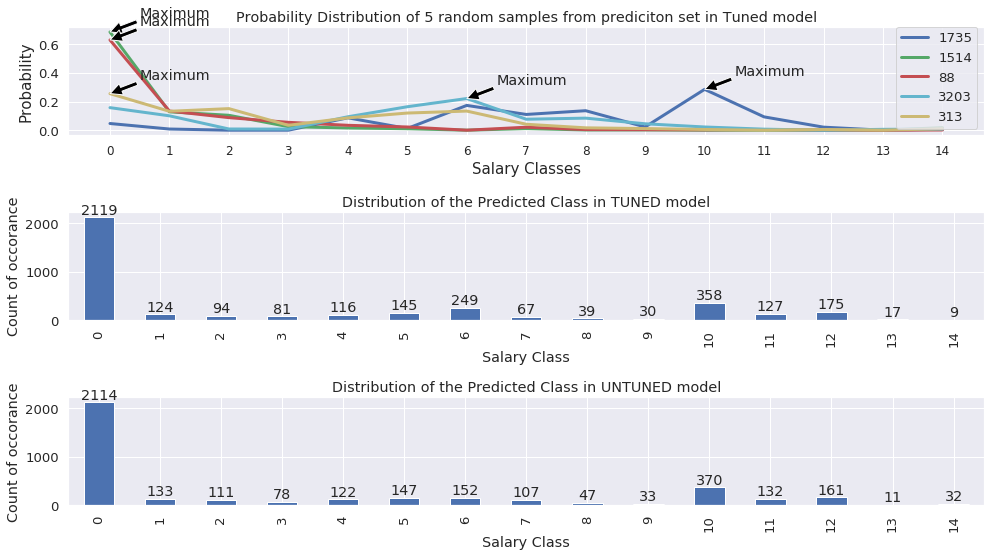

In [ ]:
## plotting probability distribution of 5 random sample sets

random.seed(1624)
rand_samples_tuned = random.randint(0, model_prob_df_normalised_tuned.shape[0], 5)
color_rand_tuned = ['b','g','r','c','y']

fig, ax = plt.subplots(3,1,figsize=(15,5))

plt.subplot(3,1,1)
for j in range(0,5):
    plt.plot(model_prob_df_normalised_tuned.iloc[rand_samples_tuned[j],:-1], marker='', color=color_rand_tuned[j], 
             linewidth=3, label = rand_samples_tuned[j])
    plt.xticks(np.arange(0,15,1), rotation=0, fontsize=12)
    plt.xlabel('Salary Classes', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.title('Probability Distribution of 5 random samples from prediciton set in Tuned model')
    ymax_tuned = max(model_prob_df_normalised_tuned.iloc[rand_samples_tuned[j],:-1])
    xmax_tuned = model_prob_df_normalised_tuned.iloc[rand_samples_tuned[j],:-1].idxmax()
    plt.annotate('Maximum', xy=(xmax_tuned, ymax_tuned), xytext=(xmax_tuned+0.5, ymax_tuned+0.1), 
                arrowprops=dict(facecolor='black', shrink = 0.005, frac=0.1))
plt.legend()
    
#Distribution of the Predicted Class in untuned model
plt.subplot(3,1,2)
ax11 = model_prob_df_normalised_tuned.iloc[:,-1].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each salary class",
                                    sort_columns = 'ascending')
ax11.set_xlabel("Salary Class")
ax11.set_ylabel("Count of occorance")
ax11.set_title ('Distribution of the Predicted Class in TUNED model')

x_labels_tuned = model_prob_df_normalised_tuned.iloc[:,-1].value_counts().sort_index().values
labels_tuned = ["%d" % i for i in x_labels_tuned]
rects_tuned = ax11.patches
for rect, label in zip(rects_tuned, labels_tuned):
    height = rect.get_height()
    ax11.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.subplot(3,1,3)

ax10 = y_pred.iloc[:,0].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each salary class",
                                    sort_columns = 'ascending')
ax10.set_xlabel("Salary Class")
ax10.set_ylabel("Count of occorance")
ax10.set_title ('Distribution of the Predicted Class in UNTUNED model')

x_labels_untuned = y_pred.iloc[:,0].value_counts().sort_index().values
labels_untuned = ["%d" % i for i in x_labels_untuned]
rects_untuned = ax10.patches
for rect, label in zip(rects_untuned, labels_untuned):
    height = rect.get_height()
    ax10.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


plt.tight_layout()

In [ ]:
y_pred_tuned_classes = model_prob_df_normalised_tuned['Predicted_classes']

### Observation

As per the distribution of predicted class and tuned and untuned model, we can see significant changes in the class distribution of the same. Lets check confusion matrix and accuracy to have a deep insight upon the nature of change in distribution.

Also, this suggests that model is highly biased for class 0, or **has high bias**

## 6.3 Comparing Model Accuracy and Confusion Matrix Tuned and Untuned
## ( Acc. 36.480% increased to 36.587%) ( F1 Sc. 29.684% increased to 32.045%)

In [ ]:
# TUNED model Accuracy score

tuned_accuracy = accuracy_score(y_test,y_pred_tuned_classes)
print('the TUNED model accuracy on testing data is = ',"{0:.3%}".format(tuned_accuracy),'\n')

prec_tuned = precision_score(y_test,y_pred_tuned_classes, average = 'weighted')
recall_tuned = recall_score(y_test,y_pred_tuned_classes, average = 'weighted')
f1_tuned = 2*prec_tuned*recall_tuned/(prec_tuned+recall_tuned)

print('TUNED F1 Score is ', "{0:.3%}".format(f1_tuned))
print('TUNED precision is ', "{0:.3%}".format(prec_tuned))
print('TUNED recall is ',"{0:.3%}".format(recall_tuned) )

# UNTUNED Accuracy score

print('\nthe untuned model accuracy on testing data is = ',"{0:.3%}".format(untuned_accuracy),'\n')
print('Untuned F1 Score is ', "{0:.3%}".format(f1_untuned))
print('untuned precision is ', "{0:.3%}".format(prec_untuned))
print('untuned recall is ',"{0:.3%}".format(recall_untuned) )

the TUNED model accuracy on testing data is =  36.613% 

TUNED F1 Score is  32.135%
TUNED precision is  28.633%
TUNED recall is  36.613%

the untuned model accuracy on testing data is =  36.480% 

Untuned F1 Score is  29.684%
untuned precision is  28.639%
untuned recall is  36.480%


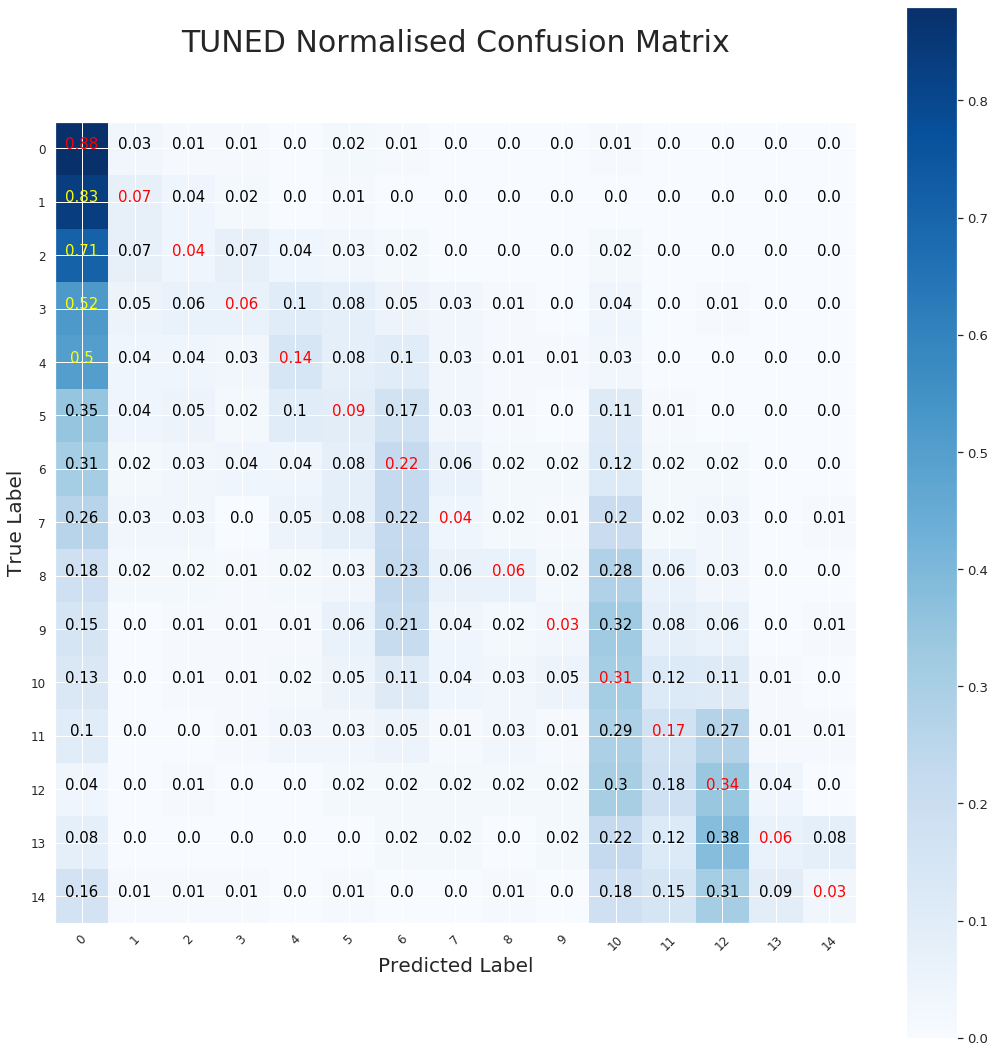

In [ ]:
# Computing the confusion matrix normalised

cm_matrix_tuned = confusion_matrix(y_test,y_pred_tuned_classes)

#normalization of confusion matrix
cm_matrix_tuned = cm_matrix_tuned.astype('float') / cm_matrix_tuned.sum(axis=1)[:, np.newaxis] 

cm_tuned = np.around(cm_matrix_tuned, decimals=2)

plt.figure(figsize=(15,15))
plt.imshow(cm_tuned, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('TUNED Normalised Confusion Matrix', fontsize=30, y=1.08)
plt.colorbar()
tick_marks_tuned = np.arange(len(y.unique()))
plt.xticks(tick_marks_tuned, rotation=45, fontsize=12)
plt.yticks(tick_marks_tuned, fontsize=12)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)

for i in range(len(cm_tuned)):
    for j in range(len(cm_tuned[i])):
        color = 'black'
        if cm_tuned[i][j] > 0.4:
            color = 'yellow'
        if i == j:
            color = 'red'
        plt.text(j, i, format(cm_tuned[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
        
plt.tight_layout()


### Observation:

**Accuracy and F1 score -**

The model **accuracy** on unseen data **has increased** from 36.480% to 36.587%. Also there is a **significant increase** in **f1 score** as well - 29.684% to 32.045%

**Confusion Matrix** - 

The heat map of confusion matrix shows that the **number of true positives have increased**, and the model is predicting correctly over the previously incorrect predictions. Major change seen in salary **class 13** which has **improved** its true positive rate from **0.0% to 6.0%**

Also, seeing the high rate of false negatives for true label 1,2,3 and 4 being predicted as 0 (83%), hence the confusion matrix suggests that the **model is highly biased towards class 0.**

**It suggests that the model's high bias (low accuracy) has been reduced from the previous one**

## 6.4 Cross validation for training and testing accuracy of the TUNED model over 10 folds

In [ ]:
# performing 10 fold cross validation

accuracy_test_tuned, accuracy_train_tuned, recall_tuned, precision_tuned, f1_score_tuned = cross_validation(X_train, y_train, 
                                                                                                  n_splits=10, solver='saga', 
                                                                                                  C = grid_best_param, 
                                                                                                    penalty='l2', 
                                                                                                  max_iter=5000)

Testing Accuracy is = 
 [0.352      0.35314286 0.36914286 0.37714286 0.38285714 0.368
 0.36114286 0.36842105 0.36956522 0.37757437]
Mean of Testing Accuracy is =  0.3678989212160837 with standard deviation of = 0.009610313996835573

Training Accuracy is = 
 [0.40027947 0.40383638 0.39799289 0.39939024 0.40002541 0.3964685
 0.39926321 0.3992125  0.40213388 0.4007367 ]
Mean of Training Accuracy is =  0.399933916627684 with standard deviation of = 0.009610313996835573

Recall is = 
 [0.352      0.35314286 0.36914286 0.37714286 0.38285714 0.368
 0.36114286 0.36842105 0.36956522 0.37757437]
Mean of Recall is =  0.3678989212160837 with standard deviation of = 0.009610313996835573

precision is = 
 [0.26574193 0.28002653 0.28515932 0.30381169 0.29945513 0.2732481
 0.2767641  0.29039161 0.29220579 0.29003918]
Mean of precision is =  0.2856843368349686 with standard deviation of = 0.011252131126321438

f1_score is = 
 [0.30284867 0.31236308 0.3217612  0.3365288  0.33605884 0.3136237
 0.3133729 

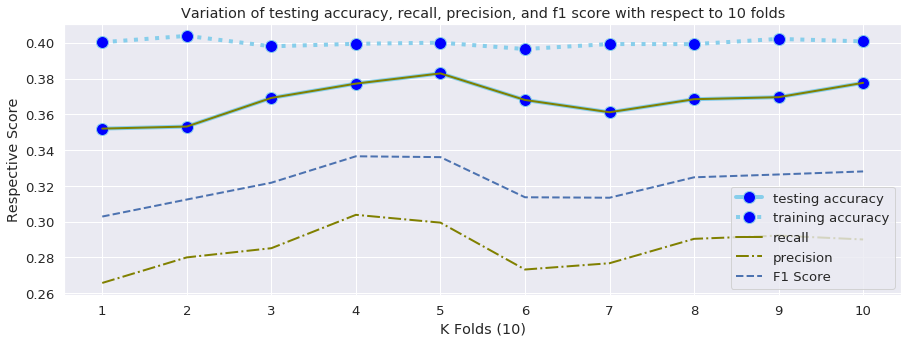

In [ ]:
# plotting the change in testing accuracy, recall, precision, and f1 score with respect to K folds
kfolds_1 = np.arange(1,11,1)

plt.figure(figsize=(15,5))
plt.plot( kfolds_1, accuracy_test_tuned, marker='o', markerfacecolor='blue', markersize=12, color='skyblue',
         linewidth=4, label = 'testing accuracy')
plt.plot( kfolds_1, accuracy_train_tuned, marker='o', linestyle=':', markerfacecolor='blue', markersize=12, color='skyblue',
         linewidth=4, label = 'training accuracy')
plt.plot( kfolds_1, recall_tuned, marker='', color='olive', linewidth=2, label = 'recall')
plt.plot( kfolds_1, precision_tuned, marker='', color='olive', linewidth=2, linestyle='-.', label='precision')
plt.plot( kfolds_1, f1_score_tuned, marker='', color='b', linewidth=2, linestyle='dashed', label='F1 Score')
plt.xticks(np.arange(1,11))

plt.xlabel("K Folds (10)")
plt.ylabel("Respective Score")
plt.title("Variation of testing accuracy, recall, precision, and f1 score with respect to 10 folds")

plt.legend()

print('Testing Accuracy is = \n', accuracy_test_tuned)
print('Mean of Testing Accuracy is = ', np.mean(accuracy_test_tuned), 'with standard deviation of =', np.std(accuracy_test_tuned))

print('\nTraining Accuracy is = \n', accuracy_train_tuned)
print('Mean of Training Accuracy is = ', np.mean(accuracy_train_tuned), 'with standard deviation of =', np.std(accuracy_test_tuned))

print('\nRecall is = \n', recall_tuned)
print('Mean of Recall is = ', np.mean(recall_tuned), 'with standard deviation of =', np.std(recall_tuned))

print('\nprecision is = \n', precision_tuned)
print('Mean of precision is = ', np.mean(precision_tuned), 'with standard deviation of =', np.std(precision_tuned))

print('\nf1_score is = \n', f1_score_tuned)
print('Mean of f1_score is = ', np.mean(f1_score_tuned), 'with standard deviation of =', np.std(f1_score_tuned))

### Observation:

The Mean **Accuracy** of the untuned model is 36.89 % with std of 1.200 %

The Mean **Accuracy** of the **TUNED** model is 36.74 % with std of 1.072 %


The Mean **F1 Score** of the untuned model is 32.51 % with std of 1.557 %

The Mean **F1 Score** of the **TUNED** model is 32.12 % with std of 1.185 %

Hence, the accuracy and f1 score in the tuned model has been **improved** becuase the **standard deviation in the f1 and accuracy has reduced after tuning**

## 6.5 Comparing TUNED Model Evaluation with Learning Curve (Bias Variance Tradeoff) with Untuned model

In [ ]:
train_acc_mean_df_tuned, train_acc_meanstd_df_tuned, testing_acc_mean_df_tuned, testing_acc_meanstd_df_tuned = learning_curve(X, y, 
                        test_sizes = [0.90, 0.75, 0.60, 0.45, 0.30, 0.15], n_splits=5, 
                       solver ='saga', C = grid_best_param, penalty='l2', max_iter=5000)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

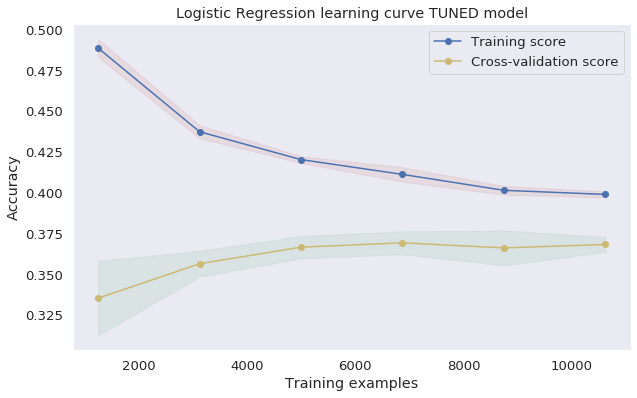

In [ ]:
## plotting learning curves for both TUNED and Untuned model
plot_learning_curve(train_acc_mean_df_tuned, train_acc_meanstd_df_tuned, 
                    testing_acc_mean_df_tuned, testing_acc_meanstd_df_tuned, title = 'Logistic Regression learning curve TUNED model')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

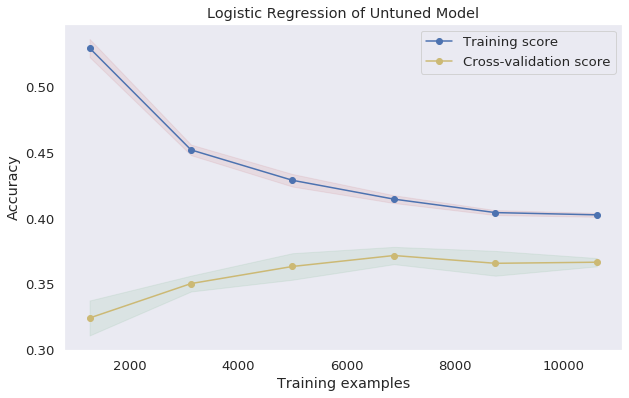

In [ ]:
plot_learning_curve(train_acc_mean_df, train_acc_meanstd_df, testing_acc_mean_df, 
                    testing_acc_meanstd_df, title = 'Logistic Regression of Untuned Model')

### Observation

As our **learning curve has a gap has further reduced** from 0.040 to 0.025 approx (difference of accuracy with largest training size). Also, our model has **improved accuracy for cross validation**. The **standard deviation has also gone down for cross validation** (testing) accuracy of the model. Also, the model suggests more assumptions about the form of the target function. The cross validation accuracy comes to about 37.5% approxonly (testing accuracy on largest training size)

Also, the model has Lower Variance: the model Suggests small changes to the estimate of the target function with changes to the training dataset. Also the gap is very low between the training and cross validation error.

**This also shows that our model is not overfit. Due to low accuracy, it could be underfit though**

High bias and low variance definition source: https://towardsdatascience.com/tradeoffs-how-to-aim-for-the-sweet-spot-c20b40d5e6b6

# 7. CONCLUSION --------------------------------------------------------------------------------------

**We now conclude and bring forward some conclusions of this exercise**

- Preliminary Accuracy : 36.480%. Tuned Accuracy : 36.587%
- Preliminary f1 score : 29.648%. Tuned f1 score : 32.045%
- The overall fit of the model was not great as the accuracy achieved was 36.587%, but the model is not overfit as shown by the learning curves (Bias Variance Tradeoff) and the confusion matrix. However it may be underfit
- The accuracy can be increased by further grouping the salary brackets. Also, other feature selection techniques such as chi square can be applied to check the affect on accuracy and tuning the respective hyper-parameters
- The accuracy can be further increased if the analysis would have been done per country, this would reduce the variance in the data and errors being added due to different money buying power in different countries. This creates an error of perspective, as the buying power of 1 dollar is differnt in Canada when compared to India
- Accuracy may increase if we use a differret solver or a different classifier altogether like SVM